# Fish the Phish

Internet as a whole has advanced quite a lot in the past decade and so has the threats associated with it. It is not rare to see companies getting hacked, or getting ransomed by threat actors these days. But more often than not, it is not the technology that is insecure, but it is the humans.

We as humans can be fooled but not the machines. One of the very common way these threat actors fool the user into giving their own info to the threat actors, is Phishing. The data these Phishers can get include but not limited to Full Names, Addressed, Usernames, Passwords, etc.

Since machines are better at finding the littlest of details users might ignore, we will be using the power of machines through Machine Learning to look for Phishing Attempts.

## Index for this Notebook

1. Reading the Dataset
2. Data Familiarization & EDA
3. Data Visualization
4. Data Splitting
5. Building & Training the Models
6. Comparing the Models
7. Conclusion

In [1]:
# Importing all the Libraries we are going to be using

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn import metrics
from sklearn.model_selection import train_test_split
from texttable import Texttable

In [2]:
# Ignoring "Future Warnings"
warnings.filterwarnings('ignore')

## 1. Reading the Dataset

Dataset Source: Kaggle, https://www.kaggle.com/datasets/eswarchandt/phishing-website-detector

> A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

In [3]:
df = pd.read_csv("./Dataset/phishing.csv")
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Data Familiarization & EDA

Here, we are using some of the DataFrame methods to take a look at the data and the features in the data.

In [4]:
# Shape of the DataFrame
df.shape

(11054, 32)

In [5]:
# List of Features in the DataFrame
list(df.columns)

['Index',
 'UsingIP',
 'LongURL',
 'ShortURL',
 'Symbol@',
 'Redirecting//',
 'PrefixSuffix-',
 'SubDomains',
 'HTTPS',
 'DomainRegLen',
 'Favicon',
 'NonStdPort',
 'HTTPSDomainURL',
 'RequestURL',
 'AnchorURL',
 'LinksInScriptTags',
 'ServerFormHandler',
 'InfoEmail',
 'AbnormalURL',
 'WebsiteForwarding',
 'StatusBarCust',
 'DisableRightClick',
 'UsingPopupWindow',
 'IframeRedirection',
 'AgeofDomain',
 'DNSRecording',
 'WebsiteTraffic',
 'PageRank',
 'GoogleIndex',
 'LinksPointingToPage',
 'StatsReport',
 'class']

In [6]:
# General Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [7]:
# Checking the Uniqueness of the Values
df.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [8]:
# Dropping the Index Column
df = df.drop(['Index'], axis=1)

In [9]:
# Describing the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


### Observations about the Dataset

1. Number of Instances: 11,054
2. Number of Features: 31
3. Out of the 31 features, 1 is dependent while the others are not
4. All data points are `int`, which means Encoding the data is not required
5. No outliers were observed
6. No missing values found

## 3. Data Visualization

Here are some visualizations to find out how the data is distributed and how the features are related to each other in the Dataset.

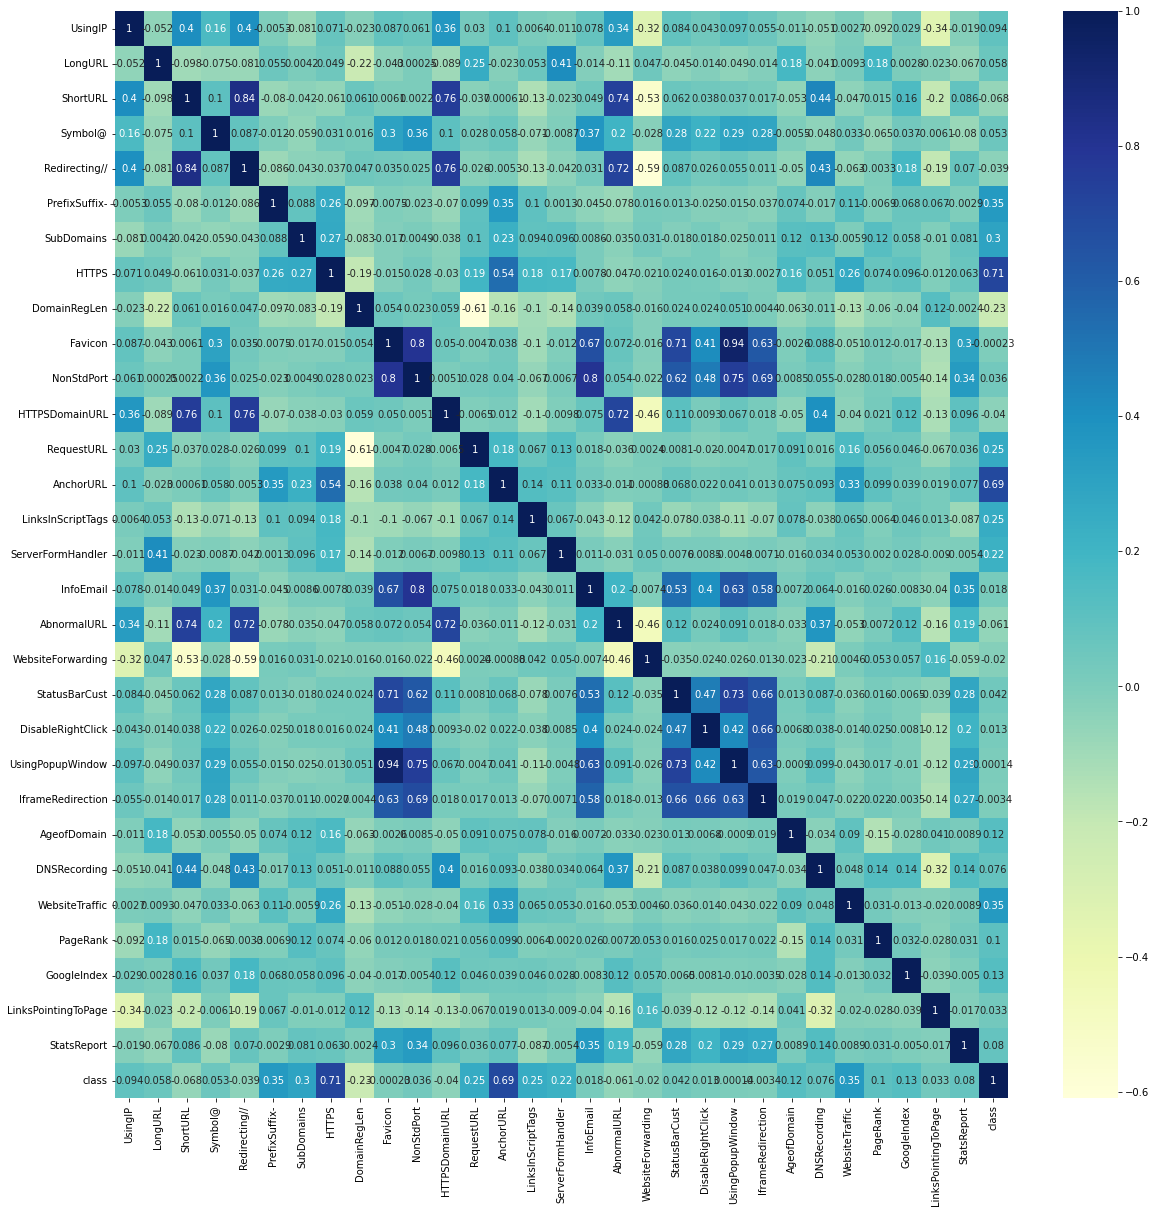

In [10]:
# Correlation Heatmap

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

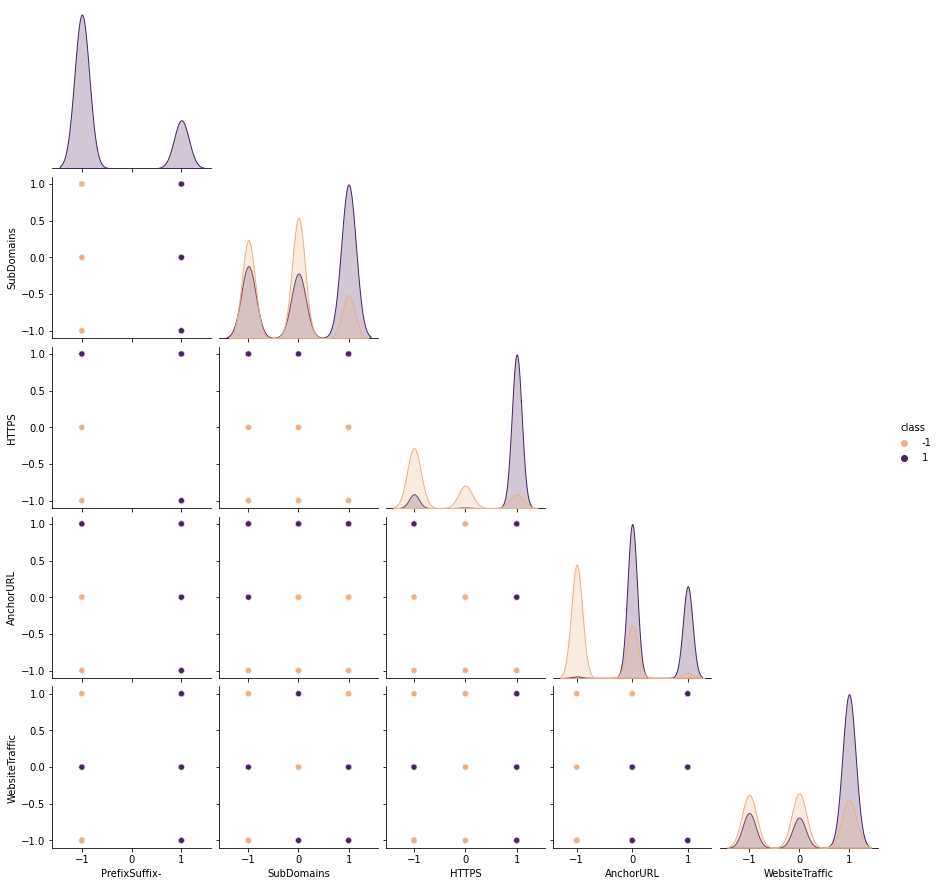

In [11]:
# Pairplot for some of the Features

df_pp = df[[
    'PrefixSuffix-',
    'SubDomains',
    'HTTPS',
    'AnchorURL',
    'WebsiteTraffic',
    'class'
]]

sns.pairplot(data=df_pp, hue="class", palette='flare', corner=True);

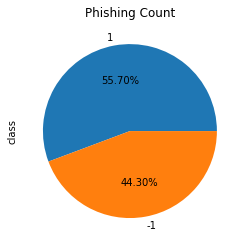

In [12]:
# Visualizing the amount of Phishing vs Non-Phishing Datapoints

df['class'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## Data Splitting

Here, we are splitting the Data into Training and Testing sets. We chose to go for an 80-20 Split.

In [13]:
# Splitting the Data into Dependent and Independent Features

X = df.drop(['class'], axis=1)
y = df['class']

In [14]:
# Splitting the Data Set into Train and Test (80-20 Split)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Checking the shape of each

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Building & Training the Models

Looking at our Dataset, we observe that our Problem Statement is one of the Classification Problems since we are trying to classify if a Website is a Phishing Page or Not.

One of the most used and one of the most accurate category of machine learning models that help solve the classification problem, is Supervised Learning.

Incidentaly, Supervised Machine Learning matches really well with our Data Set since we already have a dataset full of data points and their respective classification.

That is the reason, we chose to compare almost all of the most used Supervised Machine Learning Models for Classification as listed below:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

### Model Performance Check

In order to compare the Performance of each model, we are storing the F1 Score and the Accuracy of each model in Lists. We will be using these lists to compare the models at the end.

In [15]:
# Creating the lists to store the Performance Results

model     = []
accuracy  = []
f1_score  = []
recall    = []
precision = []

# A simple function to store the results into the lists above

def store_result(mod, acc, f1, rec, pre):
    model.append(mod)
    accuracy.append(round(acc,3))
    f1_score.append(round(f1, 3))
    recall.append(round(rec, 3))
    precision.append(round(pre, 3))

In [16]:
# Function for Calculating, Printing & Storing the Performance Results

def performance_results(name, y_train_model, y_test_model):
    # Accuracy
    acc_train = metrics.accuracy_score(y_train, y_train_model)
    acc_test  = metrics.accuracy_score(y_test, y_test_model)
    
    # F1 Score
    f1_train = metrics.f1_score(y_train, y_train_model)
    f1_test  = metrics.f1_score(y_test, y_test_model)
    
    # Recall Score
    rec_train = metrics.recall_score(y_train, y_train_model)
    rec_test  = metrics.recall_score(y_test, y_test_model)
    
    # Precission Score
    pre_train = metrics.precision_score(y_train, y_train_model)
    pre_test  = metrics.precision_score(y_test, y_test_model)
    
    print("\nPerformance Report:\n")
    table = Texttable()
    table.set_deco(Texttable.HEADER)
    table.set_cols_align(["l", "r", "r"])
    table.add_rows([
        ["Score Type", "Training Data", "Test Data"],
        ["Accuracy", "{:.3f}".format(acc_train), "{:.3f}".format(acc_test)],
        ["F1 Score", "{:.3f}".format(f1_train), "{:.3f}".format(f1_test)],
        ["Recall", "{:.3f}".format(rec_train), "{:.3f}".format(rec_test)],
        ["Precission", "{:.3f}".format(pre_train), "{:.3f}".format(pre_test)]
    ])
    print(table.draw())
    
    # Classification Report
    print(f"\n{'-'*45}\n\nClassification Report:\n")
    print(metrics.classification_report(y_test, y_test_model))
    
    # Storing the Results of current model
    store_result(name, acc_test, f1_test, rec_test, pre_test)

### 5.1 Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [17]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Instantiating the Model
log_reg = LogisticRegression()

# Fitting the Model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Predicting values with the model

y_train_log = log_reg.predict(X_train)
y_test_log = log_reg.predict(X_test)

In [19]:
# Getting and Storing the Performance Results
performance_results('Logistic Regression', y_train_log, y_test_log)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.927       0.934
F1 Score             0.935       0.941
Recall               0.943       0.953
Precission           0.927       0.930

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



### 5.2 K-Nearest Neighbors Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [20]:
# Importing K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the Model
knn = KNeighborsClassifier(n_neighbors=1)

# Fitting the Model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# Predicting values with the model

y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [22]:
performance_results('K-Nearest Neighbors', y_train_knn, y_test_knn)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.989       0.956
F1 Score             0.990       0.961
Recall               0.991       0.962
Precission           0.989       0.960

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



We did not choose a higher number for `n_neighbors` because choosing higher values were giving lower accuracies as the number increased. Here is a little visualization for this.

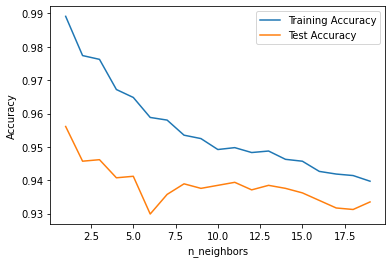

In [23]:
tmp_tra_acc = [] # Temporary Train Accuracy
tmp_tes_acc = [] # Temporary Test Accuracy

# We are testing values from 1 to 20 as the n_neighbors

depth = range(1,20)

for n in depth:

    # Instantiating & Fitting the Model
    tmp_knn = KNeighborsClassifier(n_neighbors = n)
    tmp_knn.fit(X_train, y_train)
    
    # Recording the Train and Test Accuracies
    tmp_tra_acc.append(tmp_knn.score(X_train, y_train))
    tmp_tes_acc.append(tmp_knn.score(X_test,  y_test ))

# Plotting a graph to show the Accuracies

plt.plot(depth, tmp_tra_acc, label = "Training Accuracy")
plt.plot(depth, tmp_tes_acc, label = "Test Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")

plt.legend()

### 5.3 Support Vector Machine Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [24]:
# Importing Support Vectorm Machines Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining the Parameter Range
param_grid = {
    'gamma': [0.1],
    'kernel': ['rbf','linear']
}
svc = GridSearchCV(SVC(), param_grid)

# Fitting the Model
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [25]:
# Predicting values with the model

y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [26]:
performance_results('Support Vector Machine', y_train_svc, y_test_svc)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.969       0.964
F1 Score             0.973       0.968
Recall               0.980       0.980
Precission           0.965       0.957

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



### 5.4. Naive Bayes Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [27]:
# Importing Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# Instantiating the Model
nbc = GaussianNB()

# Fitting the Model
nbc.fit(X_train, y_train)

GaussianNB()

In [28]:
# Predicting values with the model

y_train_nbc = nbc.predict(X_train)
y_test_nbc = nbc.predict(X_test)

In [29]:
performance_results('Naive Bayes Classifier', y_train_nbc, y_test_nbc)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.605       0.605
F1 Score             0.451       0.454
Recall               0.292       0.294
Precission           0.997       0.995

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.53      1.00      0.69       976
           1       0.99      0.29      0.45      1235

    accuracy                           0.60      2211
   macro avg       0.76      0.65      0.57      2211
weighted avg       0.79      0.60      0.56      2211



### 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [30]:
# Importing Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

# Instantiating the Model
dtc = DecisionTreeClassifier(max_depth=30)

# Fitting the Model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [31]:
# Predicting values with the model

y_train_dtc = dtc.predict(X_train)
y_test_dtc = dtc.predict(X_test)

In [32]:
performance_results('Decision Tree', y_train_dtc, y_test_dtc)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.991       0.959
F1 Score             0.992       0.963
Recall               0.991       0.964
Precission           0.993       0.963

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



For the variable `max_depth`, we compared the values 1 through 30 and checked how the values affect the accuracy.

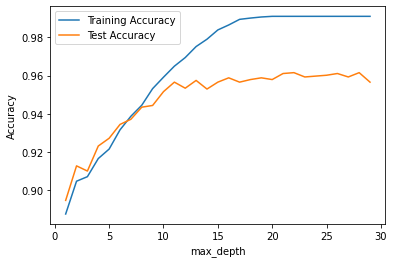

In [33]:
tmp_tra_acc = [] # Temporary Train Accuracy
tmp_tes_acc = [] # Temporary Test Accuracy

# We are testing values from 1 to 30 as max_depth

depth = range(1,30)

for n in depth:
    
    # Instantiating & Fitting the Model
    tmp_dtc = DecisionTreeClassifier(max_depth=n)
    tmp_dtc.fit(X_train, y_train)
    
    # Recording the Train & Test Accuracies
    tmp_tra_acc.append(tmp_dtc.score(X_train, y_train))
    tmp_tes_acc.append(tmp_dtc.score(X_test, y_test))

# Plotting the graph to show the Accuracies

plt.plot(depth, tmp_tra_acc, label="Training Accuracy")
plt.plot(depth, tmp_tes_acc, label="Test Accuracy")

plt.ylabel("Accuracy")  
plt.xlabel("max_depth")

plt.legend()

### 5.6 Random Forest Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [34]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiating the Model
rfc = RandomForestClassifier(n_estimators=10)

# Fitting the Model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [35]:
# Predicting values with the model

y_train_rfc = rfc.predict(X_train)
y_test_rfc = rfc.predict(X_test)

In [36]:
performance_results('Random Forest', y_train_rfc, y_test_rfc)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.991       0.970
F1 Score             0.992       0.973
Recall               0.992       0.978
Precission           0.991       0.969

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



Here is the comparision for checking the values 1 to 20 as `n_estimators` in Random Forest

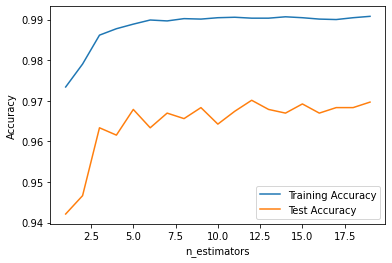

In [37]:
tmp_tra_acc = [] # Temporary Train Accuracy
tmp_tes_acc = [] # Temporary Test Accuracy

# We are testing values from 1 to 20 as n_estimator

depth = range(1,20)

for n in depth:
    
    # Instantiating & Fitting the Model
    tmp_rfc = RandomForestClassifier(n_estimators=n)
    tmp_rfc.fit(X_train, y_train)
    
    # Recording the Train & Test Accuracies
    tmp_tra_acc.append(tmp_rfc.score(X_train, y_train))
    tmp_tes_acc.append(tmp_rfc.score(X_test, y_test))

# Plotting the graph to show the Accuracies

plt.plot(depth, tmp_tra_acc, label="Training Accuracy")
plt.plot(depth, tmp_tes_acc, label="Test Accuracy")

plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")

plt.legend()

### 5.7 Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [38]:
# Importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiating the Model
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)

# Fitting the Model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [39]:
# Predicting values using the model

y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [40]:
performance_results('Gradient Boosting Classifier', y_train_gbc, y_test_gbc)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.989       0.974
F1 Score             0.990       0.977
Recall               0.994       0.989
Precission           0.986       0.966

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



Comparing the various possible values for Learning Rate and Max Depth in Gradient Boosting Classifier

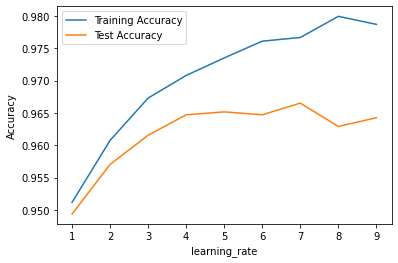

In [41]:
tmp_tra_acc = [] # Temporary Train Accuracy
tmp_tes_acc = [] # Temporary Test Accuracy

# We are testing values from 0.1 to 0.9 as learning_rate

depth = range(1,10)

for n in depth:
    
    # Instantiating & Fitting the Model
    tmp_gbc = GradientBoostingClassifier(learning_rate=n*0.1)
    tmp_gbc.fit(X_train, y_train)
    
    # Recording the Train & Test Accuracies
    tmp_tra_acc.append(tmp_gbc.score(X_train, y_train))
    tmp_tes_acc.append(tmp_gbc.score(X_test, y_test))

# Plotting the graph to show the Accuracies

plt.plot(depth, tmp_tra_acc, label="Training Accuracy")
plt.plot(depth, tmp_tes_acc, label="Test Accuracy")

plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")

plt.legend()

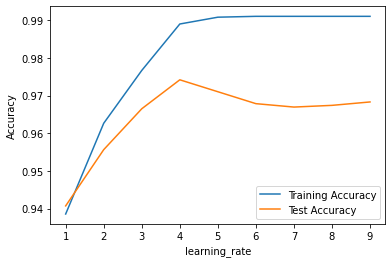

In [42]:
tmp_tra_acc = [] # Temporary Train Accuracy
tmp_tes_acc = [] # Temporary Test Accuracy

# We are testing values from 1 to 10 for max_depth.

# Also, we are taking learning_rate at 0.7 based
# on our observation in the previous cell.

depth = range(1,10)

for n in depth:
    
    # Instantiating & Fitting the Model
    tmp_gbc = GradientBoostingClassifier(
        max_depth = n,
        learning_rate = 0.7
    )
    tmp_gbc.fit(X_train, y_train)
    
    # Recording the Train & Test Accuracies
    tmp_tra_acc.append(tmp_gbc.score(X_train, y_train))
    tmp_tes_acc.append(tmp_gbc.score(X_test, y_test))

# Plotting the graph to show the Accuracies

plt.plot(depth, tmp_tra_acc, label="Training Accuracy")
plt.plot(depth, tmp_tes_acc, label="Test Accuracy")

plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")

plt.legend()

### 5.8 CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [43]:
# Importing CatBoost Classifier
from catboost import CatBoostClassifier

# Instantiating the Model
cat = CatBoostClassifier(learning_rate=0.1)

# Fitting the Model
cat.fit(X_train, y_train)

0:	learn: 0.5487232	total: 47.7ms	remaining: 47.6s
1:	learn: 0.4349357	total: 50.4ms	remaining: 25.1s
2:	learn: 0.3609236	total: 53.5ms	remaining: 17.8s
3:	learn: 0.3050829	total: 56.2ms	remaining: 14s
4:	learn: 0.2766620	total: 59ms	remaining: 11.7s
5:	learn: 0.2475476	total: 61.8ms	remaining: 10.2s
6:	learn: 0.2286637	total: 65.1ms	remaining: 9.24s
7:	learn: 0.2138754	total: 68.2ms	remaining: 8.46s
8:	learn: 0.2013643	total: 71.3ms	remaining: 7.85s
9:	learn: 0.1896378	total: 73.7ms	remaining: 7.3s
10:	learn: 0.1819539	total: 76.4ms	remaining: 6.87s
11:	learn: 0.1767867	total: 80.1ms	remaining: 6.59s
12:	learn: 0.1727735	total: 83.4ms	remaining: 6.33s
13:	learn: 0.1682578	total: 86.2ms	remaining: 6.07s
14:	learn: 0.1641759	total: 89.3ms	remaining: 5.86s
15:	learn: 0.1614218	total: 92.2ms	remaining: 5.67s
16:	learn: 0.1558968	total: 95.1ms	remaining: 5.5s
17:	learn: 0.1535881	total: 97.9ms	remaining: 5.34s
18:	learn: 0.1514228	total: 101ms	remaining: 5.21s
19:	learn: 0.1482580	total: 1

207:	learn: 0.0481178	total: 615ms	remaining: 2.34s
208:	learn: 0.0479317	total: 619ms	remaining: 2.34s
209:	learn: 0.0476658	total: 623ms	remaining: 2.34s
210:	learn: 0.0474069	total: 625ms	remaining: 2.34s
211:	learn: 0.0471817	total: 628ms	remaining: 2.33s
212:	learn: 0.0470479	total: 631ms	remaining: 2.33s
213:	learn: 0.0469487	total: 636ms	remaining: 2.33s
214:	learn: 0.0468552	total: 639ms	remaining: 2.33s
215:	learn: 0.0466651	total: 642ms	remaining: 2.33s
216:	learn: 0.0465418	total: 645ms	remaining: 2.33s
217:	learn: 0.0464800	total: 648ms	remaining: 2.33s
218:	learn: 0.0463546	total: 651ms	remaining: 2.32s
219:	learn: 0.0461314	total: 654ms	remaining: 2.32s
220:	learn: 0.0460039	total: 657ms	remaining: 2.31s
221:	learn: 0.0458286	total: 661ms	remaining: 2.31s
222:	learn: 0.0456749	total: 664ms	remaining: 2.31s
223:	learn: 0.0455866	total: 667ms	remaining: 2.31s
224:	learn: 0.0453525	total: 669ms	remaining: 2.31s
225:	learn: 0.0452161	total: 673ms	remaining: 2.31s
226:	learn: 

413:	learn: 0.0316212	total: 1.18s	remaining: 1.67s
414:	learn: 0.0315865	total: 1.19s	remaining: 1.67s
415:	learn: 0.0315026	total: 1.19s	remaining: 1.67s
416:	learn: 0.0314715	total: 1.19s	remaining: 1.67s
417:	learn: 0.0314461	total: 1.19s	remaining: 1.66s
418:	learn: 0.0313943	total: 1.2s	remaining: 1.66s
419:	learn: 0.0313461	total: 1.2s	remaining: 1.66s
420:	learn: 0.0313159	total: 1.2s	remaining: 1.65s
421:	learn: 0.0312338	total: 1.2s	remaining: 1.65s
422:	learn: 0.0311835	total: 1.21s	remaining: 1.65s
423:	learn: 0.0311514	total: 1.21s	remaining: 1.64s
424:	learn: 0.0311268	total: 1.21s	remaining: 1.64s
425:	learn: 0.0310930	total: 1.22s	remaining: 1.64s
426:	learn: 0.0310731	total: 1.22s	remaining: 1.63s
427:	learn: 0.0310464	total: 1.22s	remaining: 1.63s
428:	learn: 0.0310290	total: 1.22s	remaining: 1.63s
429:	learn: 0.0309284	total: 1.23s	remaining: 1.62s
430:	learn: 0.0308976	total: 1.23s	remaining: 1.62s
431:	learn: 0.0308595	total: 1.23s	remaining: 1.62s
432:	learn: 0.03

626:	learn: 0.0262506	total: 1.75s	remaining: 1.04s
627:	learn: 0.0262506	total: 1.76s	remaining: 1.04s
628:	learn: 0.0262506	total: 1.76s	remaining: 1.04s
629:	learn: 0.0262405	total: 1.76s	remaining: 1.03s
630:	learn: 0.0262211	total: 1.76s	remaining: 1.03s
631:	learn: 0.0262032	total: 1.77s	remaining: 1.03s
632:	learn: 0.0262032	total: 1.77s	remaining: 1.03s
633:	learn: 0.0261838	total: 1.77s	remaining: 1.02s
634:	learn: 0.0261838	total: 1.77s	remaining: 1.02s
635:	learn: 0.0261447	total: 1.78s	remaining: 1.02s
636:	learn: 0.0261279	total: 1.78s	remaining: 1.01s
637:	learn: 0.0260659	total: 1.78s	remaining: 1.01s
638:	learn: 0.0260311	total: 1.78s	remaining: 1.01s
639:	learn: 0.0259942	total: 1.79s	remaining: 1.01s
640:	learn: 0.0259507	total: 1.79s	remaining: 1s
641:	learn: 0.0259503	total: 1.79s	remaining: 1000ms
642:	learn: 0.0259394	total: 1.8s	remaining: 997ms
643:	learn: 0.0259394	total: 1.8s	remaining: 994ms
644:	learn: 0.0259230	total: 1.8s	remaining: 991ms
645:	learn: 0.025

795:	learn: 0.0249105	total: 2.13s	remaining: 546ms
796:	learn: 0.0249105	total: 2.13s	remaining: 544ms
797:	learn: 0.0249106	total: 2.14s	remaining: 541ms
798:	learn: 0.0249105	total: 2.14s	remaining: 538ms
799:	learn: 0.0249105	total: 2.14s	remaining: 535ms
800:	learn: 0.0249105	total: 2.14s	remaining: 532ms
801:	learn: 0.0249105	total: 2.15s	remaining: 530ms
802:	learn: 0.0249105	total: 2.15s	remaining: 527ms
803:	learn: 0.0249105	total: 2.15s	remaining: 524ms
804:	learn: 0.0249079	total: 2.15s	remaining: 521ms
805:	learn: 0.0249079	total: 2.15s	remaining: 518ms
806:	learn: 0.0248925	total: 2.15s	remaining: 516ms
807:	learn: 0.0248925	total: 2.16s	remaining: 513ms
808:	learn: 0.0248925	total: 2.16s	remaining: 510ms
809:	learn: 0.0248925	total: 2.16s	remaining: 507ms
810:	learn: 0.0248812	total: 2.16s	remaining: 505ms
811:	learn: 0.0248663	total: 2.17s	remaining: 502ms
812:	learn: 0.0248662	total: 2.17s	remaining: 499ms
813:	learn: 0.0248660	total: 2.17s	remaining: 496ms
814:	learn: 

In [44]:
# Predicint values with the model

y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

In [45]:
performance_results('CatBoost Classifier', y_train_cat, y_test_cat)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.991       0.972
F1 Score             0.992       0.975
Recall               0.994       0.982
Precission           0.989       0.969

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [46]:
tmp_tra_acc = [] # Temporary Train Accuracy
tmp_tes_acc = [] # Temporary Test Accuracy

# We are testing values from 0.1 to 0.9 as learning_rate

depth = range(1,10)

for n in depth:
    
    # Instantiating & Fitting the Model
    tmp_cat = CatBoostClassifier(learning_rate=n*0.1)
    tmp_cat.fit(X_train, y_train)
    
    # Recording the Train & Test Accuracies
    tmp_tra_acc.append(tmp_cat.score(X_train, y_train))
    tmp_tes_acc.append(tmp_cat.score(X_test, y_test))

0:	learn: 0.5487232	total: 1.82ms	remaining: 1.82s
1:	learn: 0.4349357	total: 4.72ms	remaining: 2.36s
2:	learn: 0.3609236	total: 7.3ms	remaining: 2.42s
3:	learn: 0.3050829	total: 14.4ms	remaining: 3.6s
4:	learn: 0.2766620	total: 17ms	remaining: 3.39s
5:	learn: 0.2475476	total: 19.5ms	remaining: 3.23s
6:	learn: 0.2286637	total: 22ms	remaining: 3.12s
7:	learn: 0.2138754	total: 24.8ms	remaining: 3.08s
8:	learn: 0.2013643	total: 27.5ms	remaining: 3.03s
9:	learn: 0.1896378	total: 30ms	remaining: 2.97s
10:	learn: 0.1819539	total: 32.6ms	remaining: 2.93s
11:	learn: 0.1767867	total: 35.5ms	remaining: 2.93s
12:	learn: 0.1727735	total: 38.6ms	remaining: 2.93s
13:	learn: 0.1682578	total: 41ms	remaining: 2.89s
14:	learn: 0.1641759	total: 43.4ms	remaining: 2.85s
15:	learn: 0.1614218	total: 45.7ms	remaining: 2.81s
16:	learn: 0.1558968	total: 48.5ms	remaining: 2.81s
17:	learn: 0.1535881	total: 51.2ms	remaining: 2.79s
18:	learn: 0.1514228	total: 53.9ms	remaining: 2.78s
19:	learn: 0.1482580	total: 56.6

199:	learn: 0.0496759	total: 555ms	remaining: 2.22s
200:	learn: 0.0494923	total: 558ms	remaining: 2.22s
201:	learn: 0.0493402	total: 560ms	remaining: 2.21s
202:	learn: 0.0492795	total: 563ms	remaining: 2.21s
203:	learn: 0.0489776	total: 565ms	remaining: 2.21s
204:	learn: 0.0486491	total: 568ms	remaining: 2.2s
205:	learn: 0.0484551	total: 571ms	remaining: 2.2s
206:	learn: 0.0482768	total: 575ms	remaining: 2.2s
207:	learn: 0.0481178	total: 578ms	remaining: 2.2s
208:	learn: 0.0479317	total: 581ms	remaining: 2.2s
209:	learn: 0.0476658	total: 583ms	remaining: 2.19s
210:	learn: 0.0474069	total: 585ms	remaining: 2.19s
211:	learn: 0.0471817	total: 589ms	remaining: 2.19s
212:	learn: 0.0470479	total: 592ms	remaining: 2.19s
213:	learn: 0.0469487	total: 596ms	remaining: 2.19s
214:	learn: 0.0468552	total: 599ms	remaining: 2.19s
215:	learn: 0.0466651	total: 602ms	remaining: 2.19s
216:	learn: 0.0465418	total: 605ms	remaining: 2.18s
217:	learn: 0.0464800	total: 608ms	remaining: 2.18s
218:	learn: 0.046

410:	learn: 0.0317538	total: 1.12s	remaining: 1.61s
411:	learn: 0.0316677	total: 1.13s	remaining: 1.61s
412:	learn: 0.0316340	total: 1.13s	remaining: 1.6s
413:	learn: 0.0316212	total: 1.13s	remaining: 1.6s
414:	learn: 0.0315865	total: 1.13s	remaining: 1.6s
415:	learn: 0.0315026	total: 1.14s	remaining: 1.6s
416:	learn: 0.0314715	total: 1.14s	remaining: 1.59s
417:	learn: 0.0314461	total: 1.14s	remaining: 1.59s
418:	learn: 0.0313943	total: 1.15s	remaining: 1.59s
419:	learn: 0.0313461	total: 1.15s	remaining: 1.58s
420:	learn: 0.0313159	total: 1.15s	remaining: 1.58s
421:	learn: 0.0312338	total: 1.15s	remaining: 1.58s
422:	learn: 0.0311835	total: 1.16s	remaining: 1.57s
423:	learn: 0.0311514	total: 1.16s	remaining: 1.57s
424:	learn: 0.0311268	total: 1.16s	remaining: 1.57s
425:	learn: 0.0310930	total: 1.16s	remaining: 1.57s
426:	learn: 0.0310731	total: 1.16s	remaining: 1.56s
427:	learn: 0.0310464	total: 1.17s	remaining: 1.56s
428:	learn: 0.0310290	total: 1.17s	remaining: 1.56s
429:	learn: 0.03

624:	learn: 0.0262811	total: 1.69s	remaining: 1.02s
625:	learn: 0.0262811	total: 1.7s	remaining: 1.01s
626:	learn: 0.0262506	total: 1.7s	remaining: 1.01s
627:	learn: 0.0262506	total: 1.7s	remaining: 1.01s
628:	learn: 0.0262506	total: 1.71s	remaining: 1.01s
629:	learn: 0.0262405	total: 1.71s	remaining: 1s
630:	learn: 0.0262211	total: 1.71s	remaining: 1s
631:	learn: 0.0262032	total: 1.72s	remaining: 1s
632:	learn: 0.0262032	total: 1.72s	remaining: 998ms
633:	learn: 0.0261838	total: 1.73s	remaining: 997ms
634:	learn: 0.0261838	total: 1.73s	remaining: 994ms
635:	learn: 0.0261447	total: 1.73s	remaining: 993ms
636:	learn: 0.0261279	total: 1.74s	remaining: 991ms
637:	learn: 0.0260659	total: 1.74s	remaining: 988ms
638:	learn: 0.0260311	total: 1.74s	remaining: 986ms
639:	learn: 0.0259942	total: 1.75s	remaining: 983ms
640:	learn: 0.0259507	total: 1.75s	remaining: 980ms
641:	learn: 0.0259503	total: 1.75s	remaining: 978ms
642:	learn: 0.0259394	total: 1.76s	remaining: 976ms
643:	learn: 0.0259394	to

787:	learn: 0.0249231	total: 2.1s	remaining: 565ms
788:	learn: 0.0249230	total: 2.1s	remaining: 562ms
789:	learn: 0.0249230	total: 2.1s	remaining: 559ms
790:	learn: 0.0249230	total: 2.1s	remaining: 556ms
791:	learn: 0.0249230	total: 2.11s	remaining: 553ms
792:	learn: 0.0249107	total: 2.11s	remaining: 550ms
793:	learn: 0.0249107	total: 2.11s	remaining: 548ms
794:	learn: 0.0249106	total: 2.11s	remaining: 545ms
795:	learn: 0.0249105	total: 2.11s	remaining: 542ms
796:	learn: 0.0249105	total: 2.12s	remaining: 539ms
797:	learn: 0.0249106	total: 2.12s	remaining: 536ms
798:	learn: 0.0249105	total: 2.12s	remaining: 534ms
799:	learn: 0.0249105	total: 2.12s	remaining: 531ms
800:	learn: 0.0249105	total: 2.12s	remaining: 528ms
801:	learn: 0.0249105	total: 2.13s	remaining: 525ms
802:	learn: 0.0249105	total: 2.13s	remaining: 522ms
803:	learn: 0.0249105	total: 2.13s	remaining: 520ms
804:	learn: 0.0249079	total: 2.13s	remaining: 517ms
805:	learn: 0.0249079	total: 2.14s	remaining: 514ms
806:	learn: 0.02

2:	learn: 0.2484932	total: 10.2ms	remaining: 3.39s
3:	learn: 0.2126684	total: 13ms	remaining: 3.24s
4:	learn: 0.1893122	total: 15.7ms	remaining: 3.12s
5:	learn: 0.1742628	total: 18.2ms	remaining: 3.01s
6:	learn: 0.1673335	total: 20.4ms	remaining: 2.89s
7:	learn: 0.1613100	total: 22.8ms	remaining: 2.83s
8:	learn: 0.1535137	total: 25.5ms	remaining: 2.81s
9:	learn: 0.1488816	total: 29.3ms	remaining: 2.9s
10:	learn: 0.1421206	total: 34.2ms	remaining: 3.07s
11:	learn: 0.1389417	total: 37.2ms	remaining: 3.06s
12:	learn: 0.1347395	total: 40.1ms	remaining: 3.04s
13:	learn: 0.1310185	total: 42.8ms	remaining: 3.01s
14:	learn: 0.1274538	total: 45.7ms	remaining: 3s
15:	learn: 0.1240928	total: 48.3ms	remaining: 2.97s
16:	learn: 0.1209822	total: 51.3ms	remaining: 2.97s
17:	learn: 0.1190487	total: 54.3ms	remaining: 2.96s
18:	learn: 0.1172151	total: 57.3ms	remaining: 2.96s
19:	learn: 0.1153427	total: 59.7ms	remaining: 2.92s
20:	learn: 0.1133872	total: 62.7ms	remaining: 2.92s
21:	learn: 0.1109772	total

216:	learn: 0.0309855	total: 582ms	remaining: 2.1s
217:	learn: 0.0309482	total: 586ms	remaining: 2.1s
218:	learn: 0.0308679	total: 589ms	remaining: 2.1s
219:	learn: 0.0307180	total: 591ms	remaining: 2.1s
220:	learn: 0.0306819	total: 594ms	remaining: 2.09s
221:	learn: 0.0306129	total: 597ms	remaining: 2.09s
222:	learn: 0.0305361	total: 599ms	remaining: 2.09s
223:	learn: 0.0304567	total: 602ms	remaining: 2.08s
224:	learn: 0.0304124	total: 605ms	remaining: 2.08s
225:	learn: 0.0303061	total: 608ms	remaining: 2.08s
226:	learn: 0.0302254	total: 610ms	remaining: 2.08s
227:	learn: 0.0301839	total: 613ms	remaining: 2.07s
228:	learn: 0.0299966	total: 615ms	remaining: 2.07s
229:	learn: 0.0298705	total: 619ms	remaining: 2.07s
230:	learn: 0.0298281	total: 622ms	remaining: 2.07s
231:	learn: 0.0297309	total: 625ms	remaining: 2.07s
232:	learn: 0.0296896	total: 628ms	remaining: 2.06s
233:	learn: 0.0296486	total: 630ms	remaining: 2.06s
234:	learn: 0.0295981	total: 633ms	remaining: 2.06s
235:	learn: 0.02

426:	learn: 0.0245071	total: 1.16s	remaining: 1.55s
427:	learn: 0.0245071	total: 1.16s	remaining: 1.55s
428:	learn: 0.0245070	total: 1.16s	remaining: 1.55s
429:	learn: 0.0245069	total: 1.17s	remaining: 1.54s
430:	learn: 0.0245068	total: 1.17s	remaining: 1.54s
431:	learn: 0.0245067	total: 1.17s	remaining: 1.54s
432:	learn: 0.0245067	total: 1.17s	remaining: 1.53s
433:	learn: 0.0245064	total: 1.17s	remaining: 1.53s
434:	learn: 0.0245063	total: 1.18s	remaining: 1.53s
435:	learn: 0.0245063	total: 1.18s	remaining: 1.53s
436:	learn: 0.0245062	total: 1.18s	remaining: 1.52s
437:	learn: 0.0245062	total: 1.19s	remaining: 1.52s
438:	learn: 0.0245062	total: 1.19s	remaining: 1.52s
439:	learn: 0.0245062	total: 1.19s	remaining: 1.51s
440:	learn: 0.0244715	total: 1.19s	remaining: 1.51s
441:	learn: 0.0244715	total: 1.19s	remaining: 1.51s
442:	learn: 0.0244334	total: 1.2s	remaining: 1.5s
443:	learn: 0.0244103	total: 1.2s	remaining: 1.5s
444:	learn: 0.0244103	total: 1.2s	remaining: 1.5s
445:	learn: 0.0244

591:	learn: 0.0243132	total: 1.54s	remaining: 1.06s
592:	learn: 0.0243131	total: 1.54s	remaining: 1.06s
593:	learn: 0.0243049	total: 1.54s	remaining: 1.05s
594:	learn: 0.0243048	total: 1.55s	remaining: 1.05s
595:	learn: 0.0243048	total: 1.55s	remaining: 1.05s
596:	learn: 0.0243048	total: 1.55s	remaining: 1.05s
597:	learn: 0.0243041	total: 1.55s	remaining: 1.04s
598:	learn: 0.0243040	total: 1.56s	remaining: 1.04s
599:	learn: 0.0243040	total: 1.56s	remaining: 1.04s
600:	learn: 0.0243039	total: 1.56s	remaining: 1.04s
601:	learn: 0.0243028	total: 1.56s	remaining: 1.03s
602:	learn: 0.0243027	total: 1.57s	remaining: 1.03s
603:	learn: 0.0243027	total: 1.57s	remaining: 1.03s
604:	learn: 0.0243026	total: 1.57s	remaining: 1.03s
605:	learn: 0.0243026	total: 1.57s	remaining: 1.02s
606:	learn: 0.0243025	total: 1.58s	remaining: 1.02s
607:	learn: 0.0243024	total: 1.58s	remaining: 1.02s
608:	learn: 0.0243024	total: 1.58s	remaining: 1.01s
609:	learn: 0.0243024	total: 1.58s	remaining: 1.01s
610:	learn: 

822:	learn: 0.0241129	total: 2.11s	remaining: 455ms
823:	learn: 0.0241129	total: 2.12s	remaining: 452ms
824:	learn: 0.0241127	total: 2.12s	remaining: 449ms
825:	learn: 0.0241128	total: 2.12s	remaining: 447ms
826:	learn: 0.0241127	total: 2.12s	remaining: 444ms
827:	learn: 0.0241126	total: 2.13s	remaining: 442ms
828:	learn: 0.0241126	total: 2.13s	remaining: 439ms
829:	learn: 0.0241126	total: 2.13s	remaining: 437ms
830:	learn: 0.0241125	total: 2.13s	remaining: 434ms
831:	learn: 0.0241125	total: 2.14s	remaining: 431ms
832:	learn: 0.0241125	total: 2.14s	remaining: 429ms
833:	learn: 0.0241125	total: 2.14s	remaining: 426ms
834:	learn: 0.0241124	total: 2.14s	remaining: 424ms
835:	learn: 0.0241124	total: 2.15s	remaining: 421ms
836:	learn: 0.0241124	total: 2.15s	remaining: 418ms
837:	learn: 0.0241124	total: 2.15s	remaining: 416ms
838:	learn: 0.0241123	total: 2.15s	remaining: 413ms
839:	learn: 0.0241123	total: 2.15s	remaining: 411ms
840:	learn: 0.0241119	total: 2.16s	remaining: 408ms
841:	learn: 

986:	learn: 0.0238201	total: 2.49s	remaining: 32.8ms
987:	learn: 0.0238200	total: 2.49s	remaining: 30.3ms
988:	learn: 0.0238200	total: 2.5s	remaining: 27.8ms
989:	learn: 0.0238200	total: 2.5s	remaining: 25.3ms
990:	learn: 0.0238199	total: 2.5s	remaining: 22.7ms
991:	learn: 0.0238199	total: 2.51s	remaining: 20.2ms
992:	learn: 0.0238199	total: 2.51s	remaining: 17.7ms
993:	learn: 0.0238072	total: 2.51s	remaining: 15.2ms
994:	learn: 0.0238014	total: 2.52s	remaining: 12.6ms
995:	learn: 0.0238013	total: 2.52s	remaining: 10.1ms
996:	learn: 0.0238013	total: 2.52s	remaining: 7.59ms
997:	learn: 0.0238013	total: 2.52s	remaining: 5.06ms
998:	learn: 0.0238013	total: 2.52s	remaining: 2.53ms
999:	learn: 0.0238012	total: 2.53s	remaining: 0us
0:	learn: 0.3845476	total: 1.86ms	remaining: 1.86s
1:	learn: 0.2478145	total: 4.31ms	remaining: 2.15s
2:	learn: 0.2135596	total: 10.2ms	remaining: 3.4s
3:	learn: 0.1818398	total: 12.9ms	remaining: 3.22s
4:	learn: 0.1686181	total: 15.4ms	remaining: 3.07s
5:	learn: 

190:	learn: 0.0263645	total: 501ms	remaining: 2.12s
191:	learn: 0.0263643	total: 504ms	remaining: 2.12s
192:	learn: 0.0263295	total: 506ms	remaining: 2.12s
193:	learn: 0.0262429	total: 509ms	remaining: 2.12s
194:	learn: 0.0261811	total: 513ms	remaining: 2.12s
195:	learn: 0.0260969	total: 515ms	remaining: 2.11s
196:	learn: 0.0260466	total: 518ms	remaining: 2.11s
197:	learn: 0.0260145	total: 521ms	remaining: 2.11s
198:	learn: 0.0258970	total: 524ms	remaining: 2.11s
199:	learn: 0.0258579	total: 527ms	remaining: 2.11s
200:	learn: 0.0258577	total: 529ms	remaining: 2.1s
201:	learn: 0.0258576	total: 531ms	remaining: 2.1s
202:	learn: 0.0258195	total: 534ms	remaining: 2.1s
203:	learn: 0.0256744	total: 537ms	remaining: 2.1s
204:	learn: 0.0256187	total: 540ms	remaining: 2.09s
205:	learn: 0.0256187	total: 542ms	remaining: 2.09s
206:	learn: 0.0256187	total: 544ms	remaining: 2.08s
207:	learn: 0.0256178	total: 546ms	remaining: 2.08s
208:	learn: 0.0256177	total: 549ms	remaining: 2.08s
209:	learn: 0.02

373:	learn: 0.0244337	total: 876ms	remaining: 1.47s
374:	learn: 0.0244335	total: 881ms	remaining: 1.47s
375:	learn: 0.0244335	total: 884ms	remaining: 1.47s
376:	learn: 0.0244334	total: 887ms	remaining: 1.47s
377:	learn: 0.0244334	total: 891ms	remaining: 1.47s
378:	learn: 0.0244333	total: 895ms	remaining: 1.47s
379:	learn: 0.0244332	total: 897ms	remaining: 1.46s
380:	learn: 0.0244332	total: 900ms	remaining: 1.46s
381:	learn: 0.0244332	total: 903ms	remaining: 1.46s
382:	learn: 0.0244331	total: 906ms	remaining: 1.46s
383:	learn: 0.0244330	total: 908ms	remaining: 1.46s
384:	learn: 0.0244329	total: 910ms	remaining: 1.45s
385:	learn: 0.0244329	total: 913ms	remaining: 1.45s
386:	learn: 0.0244329	total: 915ms	remaining: 1.45s
387:	learn: 0.0244327	total: 917ms	remaining: 1.45s
388:	learn: 0.0244327	total: 919ms	remaining: 1.44s
389:	learn: 0.0244325	total: 921ms	remaining: 1.44s
390:	learn: 0.0244324	total: 924ms	remaining: 1.44s
391:	learn: 0.0244322	total: 927ms	remaining: 1.44s
392:	learn: 

611:	learn: 0.0234331	total: 1.44s	remaining: 915ms
612:	learn: 0.0234331	total: 1.44s	remaining: 912ms
613:	learn: 0.0234330	total: 1.45s	remaining: 910ms
614:	learn: 0.0234329	total: 1.45s	remaining: 907ms
615:	learn: 0.0234329	total: 1.45s	remaining: 905ms
616:	learn: 0.0234329	total: 1.45s	remaining: 903ms
617:	learn: 0.0234329	total: 1.46s	remaining: 901ms
618:	learn: 0.0234328	total: 1.46s	remaining: 898ms
619:	learn: 0.0234328	total: 1.46s	remaining: 896ms
620:	learn: 0.0234327	total: 1.46s	remaining: 894ms
621:	learn: 0.0234326	total: 1.47s	remaining: 891ms
622:	learn: 0.0234325	total: 1.47s	remaining: 889ms
623:	learn: 0.0234324	total: 1.47s	remaining: 886ms
624:	learn: 0.0234324	total: 1.47s	remaining: 884ms
625:	learn: 0.0234324	total: 1.48s	remaining: 881ms
626:	learn: 0.0234322	total: 1.48s	remaining: 879ms
627:	learn: 0.0234323	total: 1.48s	remaining: 876ms
628:	learn: 0.0234322	total: 1.48s	remaining: 874ms
629:	learn: 0.0234321	total: 1.48s	remaining: 872ms
630:	learn: 

778:	learn: 0.0232190	total: 1.82s	remaining: 516ms
779:	learn: 0.0232189	total: 1.82s	remaining: 514ms
780:	learn: 0.0232189	total: 1.82s	remaining: 512ms
781:	learn: 0.0232188	total: 1.83s	remaining: 509ms
782:	learn: 0.0232188	total: 1.83s	remaining: 507ms
783:	learn: 0.0232188	total: 1.83s	remaining: 505ms
784:	learn: 0.0232188	total: 1.83s	remaining: 503ms
785:	learn: 0.0232188	total: 1.84s	remaining: 500ms
786:	learn: 0.0232187	total: 1.84s	remaining: 498ms
787:	learn: 0.0232187	total: 1.84s	remaining: 496ms
788:	learn: 0.0232187	total: 1.84s	remaining: 493ms
789:	learn: 0.0232187	total: 1.85s	remaining: 491ms
790:	learn: 0.0232187	total: 1.85s	remaining: 489ms
791:	learn: 0.0232186	total: 1.85s	remaining: 486ms
792:	learn: 0.0232185	total: 1.85s	remaining: 484ms
793:	learn: 0.0232184	total: 1.86s	remaining: 482ms
794:	learn: 0.0232183	total: 1.86s	remaining: 479ms
795:	learn: 0.0232183	total: 1.86s	remaining: 477ms
796:	learn: 0.0232182	total: 1.86s	remaining: 474ms
797:	learn: 

946:	learn: 0.0230641	total: 2.2s	remaining: 123ms
947:	learn: 0.0230641	total: 2.2s	remaining: 121ms
948:	learn: 0.0230640	total: 2.2s	remaining: 118ms
949:	learn: 0.0230640	total: 2.2s	remaining: 116ms
950:	learn: 0.0230639	total: 2.21s	remaining: 114ms
951:	learn: 0.0230639	total: 2.21s	remaining: 111ms
952:	learn: 0.0230639	total: 2.21s	remaining: 109ms
953:	learn: 0.0230638	total: 2.21s	remaining: 107ms
954:	learn: 0.0230638	total: 2.22s	remaining: 105ms
955:	learn: 0.0230638	total: 2.22s	remaining: 102ms
956:	learn: 0.0230635	total: 2.22s	remaining: 99.9ms
957:	learn: 0.0230635	total: 2.23s	remaining: 97.5ms
958:	learn: 0.0230634	total: 2.23s	remaining: 95.3ms
959:	learn: 0.0230634	total: 2.23s	remaining: 92.9ms
960:	learn: 0.0230634	total: 2.23s	remaining: 90.6ms
961:	learn: 0.0230633	total: 2.23s	remaining: 88.3ms
962:	learn: 0.0230632	total: 2.24s	remaining: 86ms
963:	learn: 0.0230631	total: 2.24s	remaining: 83.7ms
964:	learn: 0.0230630	total: 2.24s	remaining: 81.3ms
965:	lear

154:	learn: 0.0249767	total: 412ms	remaining: 2.24s
155:	learn: 0.0249767	total: 414ms	remaining: 2.24s
156:	learn: 0.0249765	total: 417ms	remaining: 2.24s
157:	learn: 0.0249593	total: 421ms	remaining: 2.24s
158:	learn: 0.0248955	total: 424ms	remaining: 2.24s
159:	learn: 0.0248429	total: 426ms	remaining: 2.24s
160:	learn: 0.0248426	total: 428ms	remaining: 2.23s
161:	learn: 0.0248426	total: 432ms	remaining: 2.23s
162:	learn: 0.0248425	total: 434ms	remaining: 2.23s
163:	learn: 0.0248293	total: 436ms	remaining: 2.22s
164:	learn: 0.0247473	total: 439ms	remaining: 2.22s
165:	learn: 0.0247473	total: 441ms	remaining: 2.21s
166:	learn: 0.0247469	total: 443ms	remaining: 2.21s
167:	learn: 0.0247468	total: 445ms	remaining: 2.21s
168:	learn: 0.0247467	total: 448ms	remaining: 2.2s
169:	learn: 0.0247466	total: 450ms	remaining: 2.2s
170:	learn: 0.0247466	total: 453ms	remaining: 2.19s
171:	learn: 0.0247464	total: 455ms	remaining: 2.19s
172:	learn: 0.0247463	total: 457ms	remaining: 2.18s
173:	learn: 0.

363:	learn: 0.0223184	total: 976ms	remaining: 1.71s
364:	learn: 0.0223184	total: 980ms	remaining: 1.71s
365:	learn: 0.0223182	total: 982ms	remaining: 1.7s
366:	learn: 0.0223181	total: 984ms	remaining: 1.7s
367:	learn: 0.0223179	total: 987ms	remaining: 1.69s
368:	learn: 0.0223178	total: 990ms	remaining: 1.69s
369:	learn: 0.0223179	total: 992ms	remaining: 1.69s
370:	learn: 0.0223178	total: 994ms	remaining: 1.69s
371:	learn: 0.0223176	total: 996ms	remaining: 1.68s
372:	learn: 0.0223175	total: 999ms	remaining: 1.68s
373:	learn: 0.0223163	total: 1s	remaining: 1.68s
374:	learn: 0.0223080	total: 1s	remaining: 1.67s
375:	learn: 0.0223075	total: 1.01s	remaining: 1.67s
376:	learn: 0.0223074	total: 1.01s	remaining: 1.67s
377:	learn: 0.0223073	total: 1.01s	remaining: 1.66s
378:	learn: 0.0223073	total: 1.01s	remaining: 1.66s
379:	learn: 0.0223072	total: 1.02s	remaining: 1.66s
380:	learn: 0.0223071	total: 1.02s	remaining: 1.65s
381:	learn: 0.0223071	total: 1.02s	remaining: 1.65s
382:	learn: 0.022306

536:	learn: 0.0222640	total: 1.36s	remaining: 1.17s
537:	learn: 0.0222639	total: 1.36s	remaining: 1.17s
538:	learn: 0.0222638	total: 1.36s	remaining: 1.16s
539:	learn: 0.0222638	total: 1.36s	remaining: 1.16s
540:	learn: 0.0222638	total: 1.37s	remaining: 1.16s
541:	learn: 0.0222637	total: 1.37s	remaining: 1.16s
542:	learn: 0.0222636	total: 1.37s	remaining: 1.15s
543:	learn: 0.0222636	total: 1.37s	remaining: 1.15s
544:	learn: 0.0222636	total: 1.38s	remaining: 1.15s
545:	learn: 0.0222635	total: 1.38s	remaining: 1.15s
546:	learn: 0.0222635	total: 1.38s	remaining: 1.14s
547:	learn: 0.0222633	total: 1.38s	remaining: 1.14s
548:	learn: 0.0222633	total: 1.39s	remaining: 1.14s
549:	learn: 0.0222632	total: 1.39s	remaining: 1.14s
550:	learn: 0.0222631	total: 1.39s	remaining: 1.13s
551:	learn: 0.0222631	total: 1.39s	remaining: 1.13s
552:	learn: 0.0222631	total: 1.4s	remaining: 1.13s
553:	learn: 0.0222630	total: 1.4s	remaining: 1.13s
554:	learn: 0.0222629	total: 1.4s	remaining: 1.12s
555:	learn: 0.0

697:	learn: 0.0220634	total: 1.74s	remaining: 751ms
698:	learn: 0.0220633	total: 1.74s	remaining: 748ms
699:	learn: 0.0220634	total: 1.74s	remaining: 745ms
700:	learn: 0.0220634	total: 1.74s	remaining: 743ms
701:	learn: 0.0220633	total: 1.74s	remaining: 741ms
702:	learn: 0.0220633	total: 1.75s	remaining: 740ms
703:	learn: 0.0220632	total: 1.75s	remaining: 738ms
704:	learn: 0.0220632	total: 1.76s	remaining: 736ms
705:	learn: 0.0220631	total: 1.76s	remaining: 733ms
706:	learn: 0.0220630	total: 1.76s	remaining: 731ms
707:	learn: 0.0220629	total: 1.77s	remaining: 728ms
708:	learn: 0.0220614	total: 1.77s	remaining: 726ms
709:	learn: 0.0220614	total: 1.77s	remaining: 724ms
710:	learn: 0.0220612	total: 1.77s	remaining: 721ms
711:	learn: 0.0220195	total: 1.78s	remaining: 719ms
712:	learn: 0.0220194	total: 1.78s	remaining: 717ms
713:	learn: 0.0220194	total: 1.78s	remaining: 714ms
714:	learn: 0.0220194	total: 1.78s	remaining: 712ms
715:	learn: 0.0220192	total: 1.79s	remaining: 709ms
716:	learn: 

856:	learn: 0.0217527	total: 2.13s	remaining: 355ms
857:	learn: 0.0217527	total: 2.13s	remaining: 352ms
858:	learn: 0.0217526	total: 2.13s	remaining: 350ms
859:	learn: 0.0217527	total: 2.13s	remaining: 347ms
860:	learn: 0.0217526	total: 2.14s	remaining: 345ms
861:	learn: 0.0217524	total: 2.14s	remaining: 342ms
862:	learn: 0.0217524	total: 2.14s	remaining: 340ms
863:	learn: 0.0217524	total: 2.14s	remaining: 337ms
864:	learn: 0.0217523	total: 2.15s	remaining: 335ms
865:	learn: 0.0217522	total: 2.15s	remaining: 332ms
866:	learn: 0.0217521	total: 2.15s	remaining: 330ms
867:	learn: 0.0217521	total: 2.15s	remaining: 327ms
868:	learn: 0.0217519	total: 2.15s	remaining: 325ms
869:	learn: 0.0217515	total: 2.16s	remaining: 322ms
870:	learn: 0.0217515	total: 2.16s	remaining: 320ms
871:	learn: 0.0217514	total: 2.16s	remaining: 317ms
872:	learn: 0.0217514	total: 2.16s	remaining: 315ms
873:	learn: 0.0217513	total: 2.17s	remaining: 312ms
874:	learn: 0.0217512	total: 2.17s	remaining: 310ms
875:	learn: 

74:	learn: 0.0326810	total: 210ms	remaining: 2.58s
75:	learn: 0.0325091	total: 212ms	remaining: 2.58s
76:	learn: 0.0323431	total: 215ms	remaining: 2.58s
77:	learn: 0.0321441	total: 220ms	remaining: 2.6s
78:	learn: 0.0316324	total: 223ms	remaining: 2.6s
79:	learn: 0.0314851	total: 227ms	remaining: 2.61s
80:	learn: 0.0312670	total: 232ms	remaining: 2.64s
81:	learn: 0.0311697	total: 235ms	remaining: 2.64s
82:	learn: 0.0307021	total: 240ms	remaining: 2.65s
83:	learn: 0.0304905	total: 242ms	remaining: 2.64s
84:	learn: 0.0303415	total: 245ms	remaining: 2.64s
85:	learn: 0.0301312	total: 249ms	remaining: 2.64s
86:	learn: 0.0296107	total: 252ms	remaining: 2.64s
87:	learn: 0.0294990	total: 255ms	remaining: 2.64s
88:	learn: 0.0292059	total: 257ms	remaining: 2.63s
89:	learn: 0.0290147	total: 260ms	remaining: 2.63s
90:	learn: 0.0288349	total: 264ms	remaining: 2.63s
91:	learn: 0.0286671	total: 266ms	remaining: 2.63s
92:	learn: 0.0285836	total: 269ms	remaining: 2.62s
93:	learn: 0.0283925	total: 272ms

305:	learn: 0.0221167	total: 774ms	remaining: 1.75s
306:	learn: 0.0221165	total: 776ms	remaining: 1.75s
307:	learn: 0.0221164	total: 779ms	remaining: 1.75s
308:	learn: 0.0221165	total: 781ms	remaining: 1.75s
309:	learn: 0.0221164	total: 784ms	remaining: 1.74s
310:	learn: 0.0221164	total: 786ms	remaining: 1.74s
311:	learn: 0.0221164	total: 788ms	remaining: 1.74s
312:	learn: 0.0221162	total: 790ms	remaining: 1.73s
313:	learn: 0.0221161	total: 792ms	remaining: 1.73s
314:	learn: 0.0220876	total: 795ms	remaining: 1.73s
315:	learn: 0.0220874	total: 797ms	remaining: 1.72s
316:	learn: 0.0220875	total: 799ms	remaining: 1.72s
317:	learn: 0.0220873	total: 802ms	remaining: 1.72s
318:	learn: 0.0220869	total: 805ms	remaining: 1.72s
319:	learn: 0.0220869	total: 808ms	remaining: 1.72s
320:	learn: 0.0220869	total: 810ms	remaining: 1.71s
321:	learn: 0.0220869	total: 813ms	remaining: 1.71s
322:	learn: 0.0220867	total: 815ms	remaining: 1.71s
323:	learn: 0.0220866	total: 817ms	remaining: 1.71s
324:	learn: 

534:	learn: 0.0215952	total: 1.34s	remaining: 1.16s
535:	learn: 0.0215952	total: 1.34s	remaining: 1.16s
536:	learn: 0.0215951	total: 1.34s	remaining: 1.16s
537:	learn: 0.0215949	total: 1.34s	remaining: 1.15s
538:	learn: 0.0215949	total: 1.35s	remaining: 1.15s
539:	learn: 0.0215949	total: 1.35s	remaining: 1.15s
540:	learn: 0.0215948	total: 1.35s	remaining: 1.15s
541:	learn: 0.0215948	total: 1.35s	remaining: 1.14s
542:	learn: 0.0215947	total: 1.36s	remaining: 1.14s
543:	learn: 0.0215945	total: 1.36s	remaining: 1.14s
544:	learn: 0.0215945	total: 1.36s	remaining: 1.14s
545:	learn: 0.0215944	total: 1.36s	remaining: 1.13s
546:	learn: 0.0215943	total: 1.37s	remaining: 1.13s
547:	learn: 0.0215942	total: 1.37s	remaining: 1.13s
548:	learn: 0.0215941	total: 1.37s	remaining: 1.13s
549:	learn: 0.0215940	total: 1.37s	remaining: 1.12s
550:	learn: 0.0215939	total: 1.38s	remaining: 1.12s
551:	learn: 0.0215939	total: 1.38s	remaining: 1.12s
552:	learn: 0.0215938	total: 1.38s	remaining: 1.12s
553:	learn: 

698:	learn: 0.0214326	total: 1.73s	remaining: 746ms
699:	learn: 0.0214326	total: 1.74s	remaining: 745ms
700:	learn: 0.0214325	total: 1.74s	remaining: 743ms
701:	learn: 0.0214325	total: 1.74s	remaining: 740ms
702:	learn: 0.0214323	total: 1.75s	remaining: 738ms
703:	learn: 0.0214322	total: 1.75s	remaining: 736ms
704:	learn: 0.0214322	total: 1.75s	remaining: 734ms
705:	learn: 0.0214321	total: 1.76s	remaining: 732ms
706:	learn: 0.0214321	total: 1.76s	remaining: 730ms
707:	learn: 0.0214320	total: 1.76s	remaining: 727ms
708:	learn: 0.0214320	total: 1.76s	remaining: 725ms
709:	learn: 0.0214319	total: 1.77s	remaining: 722ms
710:	learn: 0.0214319	total: 1.77s	remaining: 720ms
711:	learn: 0.0214320	total: 1.77s	remaining: 718ms
712:	learn: 0.0214318	total: 1.78s	remaining: 715ms
713:	learn: 0.0214318	total: 1.78s	remaining: 713ms
714:	learn: 0.0214318	total: 1.78s	remaining: 710ms
715:	learn: 0.0214318	total: 1.78s	remaining: 708ms
716:	learn: 0.0214317	total: 1.79s	remaining: 706ms
717:	learn: 

861:	learn: 0.0214179	total: 2.11s	remaining: 338ms
862:	learn: 0.0214178	total: 2.11s	remaining: 335ms
863:	learn: 0.0214178	total: 2.11s	remaining: 333ms
864:	learn: 0.0214178	total: 2.12s	remaining: 330ms
865:	learn: 0.0214178	total: 2.12s	remaining: 328ms
866:	learn: 0.0214178	total: 2.12s	remaining: 325ms
867:	learn: 0.0214177	total: 2.12s	remaining: 323ms
868:	learn: 0.0214173	total: 2.13s	remaining: 320ms
869:	learn: 0.0214173	total: 2.13s	remaining: 318ms
870:	learn: 0.0214172	total: 2.13s	remaining: 315ms
871:	learn: 0.0214172	total: 2.13s	remaining: 313ms
872:	learn: 0.0214171	total: 2.13s	remaining: 310ms
873:	learn: 0.0214171	total: 2.14s	remaining: 308ms
874:	learn: 0.0214171	total: 2.14s	remaining: 306ms
875:	learn: 0.0214171	total: 2.14s	remaining: 303ms
876:	learn: 0.0214171	total: 2.14s	remaining: 301ms
877:	learn: 0.0214158	total: 2.14s	remaining: 298ms
878:	learn: 0.0214157	total: 2.15s	remaining: 295ms
879:	learn: 0.0214154	total: 2.15s	remaining: 293ms
880:	learn: 

76:	learn: 0.0287365	total: 203ms	remaining: 2.44s
77:	learn: 0.0285612	total: 206ms	remaining: 2.43s
78:	learn: 0.0282720	total: 209ms	remaining: 2.43s
79:	learn: 0.0280866	total: 212ms	remaining: 2.43s
80:	learn: 0.0279603	total: 215ms	remaining: 2.43s
81:	learn: 0.0278472	total: 217ms	remaining: 2.43s
82:	learn: 0.0276967	total: 219ms	remaining: 2.42s
83:	learn: 0.0275243	total: 223ms	remaining: 2.43s
84:	learn: 0.0273238	total: 226ms	remaining: 2.43s
85:	learn: 0.0271939	total: 228ms	remaining: 2.42s
86:	learn: 0.0271414	total: 231ms	remaining: 2.42s
87:	learn: 0.0268713	total: 234ms	remaining: 2.42s
88:	learn: 0.0266235	total: 237ms	remaining: 2.43s
89:	learn: 0.0266208	total: 240ms	remaining: 2.42s
90:	learn: 0.0264745	total: 243ms	remaining: 2.42s
91:	learn: 0.0262589	total: 245ms	remaining: 2.42s
92:	learn: 0.0261375	total: 248ms	remaining: 2.42s
93:	learn: 0.0259650	total: 251ms	remaining: 2.42s
94:	learn: 0.0258134	total: 253ms	remaining: 2.41s
95:	learn: 0.0256792	total: 255

238:	learn: 0.0224783	total: 582ms	remaining: 1.85s
239:	learn: 0.0224783	total: 585ms	remaining: 1.85s
240:	learn: 0.0224783	total: 587ms	remaining: 1.85s
241:	learn: 0.0224783	total: 589ms	remaining: 1.84s
242:	learn: 0.0224783	total: 591ms	remaining: 1.84s
243:	learn: 0.0224783	total: 593ms	remaining: 1.84s
244:	learn: 0.0224783	total: 595ms	remaining: 1.83s
245:	learn: 0.0223399	total: 598ms	remaining: 1.83s
246:	learn: 0.0223398	total: 600ms	remaining: 1.83s
247:	learn: 0.0223397	total: 603ms	remaining: 1.83s
248:	learn: 0.0223396	total: 605ms	remaining: 1.82s
249:	learn: 0.0223394	total: 607ms	remaining: 1.82s
250:	learn: 0.0223393	total: 610ms	remaining: 1.82s
251:	learn: 0.0223391	total: 612ms	remaining: 1.81s
252:	learn: 0.0223390	total: 614ms	remaining: 1.81s
253:	learn: 0.0223389	total: 616ms	remaining: 1.81s
254:	learn: 0.0223388	total: 618ms	remaining: 1.8s
255:	learn: 0.0223386	total: 620ms	remaining: 1.8s
256:	learn: 0.0223385	total: 623ms	remaining: 1.8s
257:	learn: 0.0

414:	learn: 0.0209599	total: 961ms	remaining: 1.35s
415:	learn: 0.0209598	total: 963ms	remaining: 1.35s
416:	learn: 0.0209597	total: 965ms	remaining: 1.35s
417:	learn: 0.0209597	total: 967ms	remaining: 1.35s
418:	learn: 0.0209597	total: 969ms	remaining: 1.34s
419:	learn: 0.0209596	total: 971ms	remaining: 1.34s
420:	learn: 0.0209596	total: 974ms	remaining: 1.34s
421:	learn: 0.0209594	total: 976ms	remaining: 1.34s
422:	learn: 0.0209593	total: 978ms	remaining: 1.33s
423:	learn: 0.0209593	total: 981ms	remaining: 1.33s
424:	learn: 0.0209591	total: 984ms	remaining: 1.33s
425:	learn: 0.0209589	total: 986ms	remaining: 1.33s
426:	learn: 0.0209589	total: 989ms	remaining: 1.33s
427:	learn: 0.0209588	total: 991ms	remaining: 1.32s
428:	learn: 0.0209587	total: 993ms	remaining: 1.32s
429:	learn: 0.0209586	total: 995ms	remaining: 1.32s
430:	learn: 0.0209586	total: 998ms	remaining: 1.32s
431:	learn: 0.0209584	total: 1s	remaining: 1.31s
432:	learn: 0.0209583	total: 1s	remaining: 1.31s
433:	learn: 0.0209

581:	learn: 0.0209442	total: 1.34s	remaining: 963ms
582:	learn: 0.0209441	total: 1.34s	remaining: 961ms
583:	learn: 0.0209439	total: 1.34s	remaining: 959ms
584:	learn: 0.0209439	total: 1.35s	remaining: 956ms
585:	learn: 0.0209439	total: 1.35s	remaining: 954ms
586:	learn: 0.0209439	total: 1.35s	remaining: 951ms
587:	learn: 0.0209438	total: 1.35s	remaining: 950ms
588:	learn: 0.0209438	total: 1.36s	remaining: 949ms
589:	learn: 0.0209431	total: 1.36s	remaining: 947ms
590:	learn: 0.0209431	total: 1.36s	remaining: 944ms
591:	learn: 0.0209429	total: 1.37s	remaining: 942ms
592:	learn: 0.0209428	total: 1.37s	remaining: 940ms
593:	learn: 0.0209426	total: 1.37s	remaining: 938ms
594:	learn: 0.0209253	total: 1.37s	remaining: 935ms
595:	learn: 0.0209252	total: 1.38s	remaining: 933ms
596:	learn: 0.0209251	total: 1.38s	remaining: 931ms
597:	learn: 0.0209250	total: 1.38s	remaining: 929ms
598:	learn: 0.0209250	total: 1.38s	remaining: 927ms
599:	learn: 0.0209247	total: 1.39s	remaining: 925ms
600:	learn: 

751:	learn: 0.0209107	total: 1.72s	remaining: 567ms
752:	learn: 0.0209107	total: 1.72s	remaining: 565ms
753:	learn: 0.0209107	total: 1.72s	remaining: 563ms
754:	learn: 0.0209106	total: 1.73s	remaining: 561ms
755:	learn: 0.0209106	total: 1.73s	remaining: 558ms
756:	learn: 0.0209106	total: 1.73s	remaining: 556ms
757:	learn: 0.0209106	total: 1.73s	remaining: 554ms
758:	learn: 0.0209105	total: 1.74s	remaining: 551ms
759:	learn: 0.0209105	total: 1.74s	remaining: 549ms
760:	learn: 0.0209106	total: 1.74s	remaining: 547ms
761:	learn: 0.0209105	total: 1.74s	remaining: 545ms
762:	learn: 0.0209104	total: 1.75s	remaining: 542ms
763:	learn: 0.0209104	total: 1.75s	remaining: 540ms
764:	learn: 0.0209104	total: 1.75s	remaining: 538ms
765:	learn: 0.0209104	total: 1.75s	remaining: 535ms
766:	learn: 0.0209104	total: 1.75s	remaining: 533ms
767:	learn: 0.0209104	total: 1.76s	remaining: 531ms
768:	learn: 0.0209103	total: 1.76s	remaining: 528ms
769:	learn: 0.0209104	total: 1.76s	remaining: 526ms
770:	learn: 

910:	learn: 0.0209016	total: 2.09s	remaining: 205ms
911:	learn: 0.0209016	total: 2.1s	remaining: 202ms
912:	learn: 0.0209016	total: 2.1s	remaining: 200ms
913:	learn: 0.0209015	total: 2.1s	remaining: 198ms
914:	learn: 0.0209014	total: 2.1s	remaining: 196ms
915:	learn: 0.0209013	total: 2.11s	remaining: 193ms
916:	learn: 0.0209013	total: 2.11s	remaining: 191ms
917:	learn: 0.0209012	total: 2.11s	remaining: 189ms
918:	learn: 0.0209011	total: 2.11s	remaining: 186ms
919:	learn: 0.0209010	total: 2.12s	remaining: 184ms
920:	learn: 0.0209010	total: 2.12s	remaining: 182ms
921:	learn: 0.0209009	total: 2.12s	remaining: 179ms
922:	learn: 0.0209009	total: 2.12s	remaining: 177ms
923:	learn: 0.0209008	total: 2.13s	remaining: 175ms
924:	learn: 0.0209008	total: 2.13s	remaining: 173ms
925:	learn: 0.0209007	total: 2.13s	remaining: 170ms
926:	learn: 0.0209006	total: 2.13s	remaining: 168ms
927:	learn: 0.0209006	total: 2.13s	remaining: 166ms
928:	learn: 0.0209006	total: 2.14s	remaining: 163ms
929:	learn: 0.02

124:	learn: 0.0218639	total: 321ms	remaining: 2.25s
125:	learn: 0.0218639	total: 324ms	remaining: 2.25s
126:	learn: 0.0218639	total: 326ms	remaining: 2.24s
127:	learn: 0.0218638	total: 329ms	remaining: 2.24s
128:	learn: 0.0218638	total: 332ms	remaining: 2.24s
129:	learn: 0.0218638	total: 334ms	remaining: 2.23s
130:	learn: 0.0218637	total: 336ms	remaining: 2.23s
131:	learn: 0.0218636	total: 338ms	remaining: 2.22s
132:	learn: 0.0218614	total: 340ms	remaining: 2.22s
133:	learn: 0.0218613	total: 342ms	remaining: 2.21s
134:	learn: 0.0218612	total: 345ms	remaining: 2.21s
135:	learn: 0.0218612	total: 347ms	remaining: 2.2s
136:	learn: 0.0218611	total: 349ms	remaining: 2.2s
137:	learn: 0.0218609	total: 351ms	remaining: 2.19s
138:	learn: 0.0218608	total: 353ms	remaining: 2.19s
139:	learn: 0.0218607	total: 356ms	remaining: 2.18s
140:	learn: 0.0218606	total: 358ms	remaining: 2.18s
141:	learn: 0.0218605	total: 360ms	remaining: 2.18s
142:	learn: 0.0218604	total: 363ms	remaining: 2.18s
143:	learn: 0.

285:	learn: 0.0211911	total: 698ms	remaining: 1.74s
286:	learn: 0.0211910	total: 701ms	remaining: 1.74s
287:	learn: 0.0211909	total: 703ms	remaining: 1.74s
288:	learn: 0.0211909	total: 705ms	remaining: 1.73s
289:	learn: 0.0211908	total: 708ms	remaining: 1.73s
290:	learn: 0.0211906	total: 711ms	remaining: 1.73s
291:	learn: 0.0211904	total: 713ms	remaining: 1.73s
292:	learn: 0.0211904	total: 716ms	remaining: 1.73s
293:	learn: 0.0211903	total: 719ms	remaining: 1.73s
294:	learn: 0.0211903	total: 721ms	remaining: 1.72s
295:	learn: 0.0211903	total: 723ms	remaining: 1.72s
296:	learn: 0.0211901	total: 725ms	remaining: 1.72s
297:	learn: 0.0211901	total: 727ms	remaining: 1.71s
298:	learn: 0.0211900	total: 730ms	remaining: 1.71s
299:	learn: 0.0211898	total: 732ms	remaining: 1.71s
300:	learn: 0.0211898	total: 736ms	remaining: 1.71s
301:	learn: 0.0211897	total: 738ms	remaining: 1.71s
302:	learn: 0.0211896	total: 741ms	remaining: 1.7s
303:	learn: 0.0211896	total: 743ms	remaining: 1.7s
304:	learn: 0.

450:	learn: 0.0210246	total: 1.1s	remaining: 1.33s
451:	learn: 0.0210246	total: 1.1s	remaining: 1.33s
452:	learn: 0.0210244	total: 1.1s	remaining: 1.33s
453:	learn: 0.0210245	total: 1.1s	remaining: 1.33s
454:	learn: 0.0210245	total: 1.11s	remaining: 1.32s
455:	learn: 0.0210243	total: 1.11s	remaining: 1.32s
456:	learn: 0.0210241	total: 1.11s	remaining: 1.32s
457:	learn: 0.0210236	total: 1.11s	remaining: 1.32s
458:	learn: 0.0210234	total: 1.12s	remaining: 1.32s
459:	learn: 0.0210233	total: 1.12s	remaining: 1.31s
460:	learn: 0.0210233	total: 1.12s	remaining: 1.31s
461:	learn: 0.0210233	total: 1.12s	remaining: 1.31s
462:	learn: 0.0210232	total: 1.13s	remaining: 1.31s
463:	learn: 0.0210231	total: 1.13s	remaining: 1.3s
464:	learn: 0.0210229	total: 1.13s	remaining: 1.3s
465:	learn: 0.0210228	total: 1.13s	remaining: 1.3s
466:	learn: 0.0210228	total: 1.14s	remaining: 1.29s
467:	learn: 0.0210228	total: 1.14s	remaining: 1.29s
468:	learn: 0.0210227	total: 1.14s	remaining: 1.29s
469:	learn: 0.02102

613:	learn: 0.0209129	total: 1.45s	remaining: 913ms
614:	learn: 0.0209128	total: 1.45s	remaining: 911ms
615:	learn: 0.0209127	total: 1.46s	remaining: 908ms
616:	learn: 0.0209126	total: 1.46s	remaining: 906ms
617:	learn: 0.0209125	total: 1.46s	remaining: 904ms
618:	learn: 0.0209124	total: 1.47s	remaining: 902ms
619:	learn: 0.0209123	total: 1.47s	remaining: 899ms
620:	learn: 0.0209123	total: 1.47s	remaining: 897ms
621:	learn: 0.0209122	total: 1.47s	remaining: 895ms
622:	learn: 0.0209122	total: 1.48s	remaining: 893ms
623:	learn: 0.0209122	total: 1.48s	remaining: 890ms
624:	learn: 0.0209122	total: 1.48s	remaining: 888ms
625:	learn: 0.0209120	total: 1.48s	remaining: 885ms
626:	learn: 0.0209119	total: 1.48s	remaining: 883ms
627:	learn: 0.0209118	total: 1.49s	remaining: 881ms
628:	learn: 0.0209118	total: 1.49s	remaining: 878ms
629:	learn: 0.0209116	total: 1.49s	remaining: 876ms
630:	learn: 0.0209117	total: 1.49s	remaining: 873ms
631:	learn: 0.0209117	total: 1.5s	remaining: 871ms
632:	learn: 0

774:	learn: 0.0208968	total: 1.82s	remaining: 530ms
775:	learn: 0.0208966	total: 1.83s	remaining: 527ms
776:	learn: 0.0208966	total: 1.83s	remaining: 525ms
777:	learn: 0.0208965	total: 1.83s	remaining: 523ms
778:	learn: 0.0208965	total: 1.83s	remaining: 521ms
779:	learn: 0.0208966	total: 1.84s	remaining: 518ms
780:	learn: 0.0208964	total: 1.84s	remaining: 516ms
781:	learn: 0.0208964	total: 1.84s	remaining: 513ms
782:	learn: 0.0208963	total: 1.84s	remaining: 511ms
783:	learn: 0.0208963	total: 1.85s	remaining: 509ms
784:	learn: 0.0208962	total: 1.85s	remaining: 506ms
785:	learn: 0.0208960	total: 1.85s	remaining: 504ms
786:	learn: 0.0208959	total: 1.85s	remaining: 502ms
787:	learn: 0.0208951	total: 1.86s	remaining: 499ms
788:	learn: 0.0208950	total: 1.86s	remaining: 497ms
789:	learn: 0.0208949	total: 1.86s	remaining: 495ms
790:	learn: 0.0208948	total: 1.86s	remaining: 492ms
791:	learn: 0.0208947	total: 1.86s	remaining: 490ms
792:	learn: 0.0208946	total: 1.87s	remaining: 487ms
793:	learn: 

940:	learn: 0.0208778	total: 2.2s	remaining: 138ms
941:	learn: 0.0208777	total: 2.2s	remaining: 136ms
942:	learn: 0.0208776	total: 2.21s	remaining: 133ms
943:	learn: 0.0208776	total: 2.21s	remaining: 131ms
944:	learn: 0.0208775	total: 2.21s	remaining: 129ms
945:	learn: 0.0208775	total: 2.21s	remaining: 126ms
946:	learn: 0.0208774	total: 2.21s	remaining: 124ms
947:	learn: 0.0208774	total: 2.22s	remaining: 122ms
948:	learn: 0.0208772	total: 2.22s	remaining: 119ms
949:	learn: 0.0208770	total: 2.22s	remaining: 117ms
950:	learn: 0.0208765	total: 2.22s	remaining: 115ms
951:	learn: 0.0208764	total: 2.23s	remaining: 112ms
952:	learn: 0.0208762	total: 2.23s	remaining: 110ms
953:	learn: 0.0208761	total: 2.23s	remaining: 108ms
954:	learn: 0.0208760	total: 2.23s	remaining: 105ms
955:	learn: 0.0208760	total: 2.23s	remaining: 103ms
956:	learn: 0.0208758	total: 2.24s	remaining: 101ms
957:	learn: 0.0208752	total: 2.24s	remaining: 98.2ms
958:	learn: 0.0208751	total: 2.24s	remaining: 95.9ms
959:	learn: 

150:	learn: 0.0215992	total: 409ms	remaining: 2.3s
151:	learn: 0.0215991	total: 412ms	remaining: 2.3s
152:	learn: 0.0215991	total: 414ms	remaining: 2.29s
153:	learn: 0.0215990	total: 417ms	remaining: 2.29s
154:	learn: 0.0215986	total: 419ms	remaining: 2.28s
155:	learn: 0.0215984	total: 423ms	remaining: 2.29s
156:	learn: 0.0215983	total: 425ms	remaining: 2.28s
157:	learn: 0.0215982	total: 428ms	remaining: 2.28s
158:	learn: 0.0215978	total: 430ms	remaining: 2.28s
159:	learn: 0.0215977	total: 433ms	remaining: 2.27s
160:	learn: 0.0215977	total: 436ms	remaining: 2.27s
161:	learn: 0.0215975	total: 438ms	remaining: 2.27s
162:	learn: 0.0215975	total: 440ms	remaining: 2.26s
163:	learn: 0.0215972	total: 443ms	remaining: 2.26s
164:	learn: 0.0215971	total: 445ms	remaining: 2.25s
165:	learn: 0.0215971	total: 448ms	remaining: 2.25s
166:	learn: 0.0215971	total: 450ms	remaining: 2.25s
167:	learn: 0.0215971	total: 452ms	remaining: 2.24s
168:	learn: 0.0215971	total: 455ms	remaining: 2.24s
169:	learn: 0.

323:	learn: 0.0211788	total: 793ms	remaining: 1.65s
324:	learn: 0.0211788	total: 795ms	remaining: 1.65s
325:	learn: 0.0211787	total: 797ms	remaining: 1.65s
326:	learn: 0.0211785	total: 799ms	remaining: 1.64s
327:	learn: 0.0211785	total: 801ms	remaining: 1.64s
328:	learn: 0.0211783	total: 804ms	remaining: 1.64s
329:	learn: 0.0211783	total: 806ms	remaining: 1.64s
330:	learn: 0.0211780	total: 808ms	remaining: 1.63s
331:	learn: 0.0211780	total: 810ms	remaining: 1.63s
332:	learn: 0.0211778	total: 813ms	remaining: 1.63s
333:	learn: 0.0211777	total: 816ms	remaining: 1.63s
334:	learn: 0.0211777	total: 818ms	remaining: 1.62s
335:	learn: 0.0211776	total: 820ms	remaining: 1.62s
336:	learn: 0.0211773	total: 822ms	remaining: 1.62s
337:	learn: 0.0211773	total: 825ms	remaining: 1.61s
338:	learn: 0.0211771	total: 827ms	remaining: 1.61s
339:	learn: 0.0211770	total: 829ms	remaining: 1.61s
340:	learn: 0.0211769	total: 831ms	remaining: 1.6s
341:	learn: 0.0211769	total: 833ms	remaining: 1.6s
342:	learn: 0.

490:	learn: 0.0210027	total: 1.17s	remaining: 1.22s
491:	learn: 0.0210026	total: 1.18s	remaining: 1.21s
492:	learn: 0.0210024	total: 1.18s	remaining: 1.21s
493:	learn: 0.0210024	total: 1.18s	remaining: 1.21s
494:	learn: 0.0210024	total: 1.18s	remaining: 1.21s
495:	learn: 0.0210023	total: 1.19s	remaining: 1.21s
496:	learn: 0.0210022	total: 1.19s	remaining: 1.2s
497:	learn: 0.0210021	total: 1.19s	remaining: 1.2s
498:	learn: 0.0210020	total: 1.2s	remaining: 1.2s
499:	learn: 0.0210016	total: 1.2s	remaining: 1.2s
500:	learn: 0.0210016	total: 1.21s	remaining: 1.2s
501:	learn: 0.0210015	total: 1.21s	remaining: 1.2s
502:	learn: 0.0210014	total: 1.21s	remaining: 1.2s
503:	learn: 0.0210014	total: 1.21s	remaining: 1.19s
504:	learn: 0.0210014	total: 1.22s	remaining: 1.19s
505:	learn: 0.0210012	total: 1.22s	remaining: 1.19s
506:	learn: 0.0210010	total: 1.22s	remaining: 1.19s
507:	learn: 0.0210010	total: 1.22s	remaining: 1.18s
508:	learn: 0.0210009	total: 1.23s	remaining: 1.19s
509:	learn: 0.0210007

718:	learn: 0.0209738	total: 1.74s	remaining: 681ms
719:	learn: 0.0209737	total: 1.74s	remaining: 679ms
720:	learn: 0.0209737	total: 1.75s	remaining: 676ms
721:	learn: 0.0209736	total: 1.75s	remaining: 674ms
722:	learn: 0.0209731	total: 1.75s	remaining: 671ms
723:	learn: 0.0209730	total: 1.75s	remaining: 669ms
724:	learn: 0.0209730	total: 1.75s	remaining: 666ms
725:	learn: 0.0209723	total: 1.76s	remaining: 664ms
726:	learn: 0.0209722	total: 1.76s	remaining: 662ms
727:	learn: 0.0209722	total: 1.76s	remaining: 660ms
728:	learn: 0.0209722	total: 1.77s	remaining: 657ms
729:	learn: 0.0209719	total: 1.77s	remaining: 655ms
730:	learn: 0.0209716	total: 1.77s	remaining: 653ms
731:	learn: 0.0209714	total: 1.77s	remaining: 650ms
732:	learn: 0.0209714	total: 1.78s	remaining: 648ms
733:	learn: 0.0209711	total: 1.78s	remaining: 645ms
734:	learn: 0.0209710	total: 1.78s	remaining: 643ms
735:	learn: 0.0209709	total: 1.78s	remaining: 641ms
736:	learn: 0.0209709	total: 1.79s	remaining: 638ms
737:	learn: 

944:	learn: 0.0209508	total: 2.31s	remaining: 134ms
945:	learn: 0.0209508	total: 2.31s	remaining: 132ms
946:	learn: 0.0209508	total: 2.31s	remaining: 130ms
947:	learn: 0.0209507	total: 2.32s	remaining: 127ms
948:	learn: 0.0209506	total: 2.32s	remaining: 125ms
949:	learn: 0.0209504	total: 2.32s	remaining: 122ms
950:	learn: 0.0209504	total: 2.32s	remaining: 120ms
951:	learn: 0.0209503	total: 2.33s	remaining: 117ms
952:	learn: 0.0209503	total: 2.33s	remaining: 115ms
953:	learn: 0.0209494	total: 2.33s	remaining: 112ms
954:	learn: 0.0209494	total: 2.33s	remaining: 110ms
955:	learn: 0.0209493	total: 2.34s	remaining: 108ms
956:	learn: 0.0209492	total: 2.34s	remaining: 105ms
957:	learn: 0.0209488	total: 2.34s	remaining: 103ms
958:	learn: 0.0209487	total: 2.34s	remaining: 100ms
959:	learn: 0.0209488	total: 2.35s	remaining: 97.8ms
960:	learn: 0.0209487	total: 2.35s	remaining: 95.4ms
961:	learn: 0.0209486	total: 2.35s	remaining: 93ms
962:	learn: 0.0209486	total: 2.36s	remaining: 90.6ms
963:	learn

167:	learn: 0.0215385	total: 393ms	remaining: 1.95s
168:	learn: 0.0215384	total: 396ms	remaining: 1.95s
169:	learn: 0.0215382	total: 399ms	remaining: 1.95s
170:	learn: 0.0215382	total: 401ms	remaining: 1.95s
171:	learn: 0.0215381	total: 403ms	remaining: 1.94s
172:	learn: 0.0215381	total: 405ms	remaining: 1.94s
173:	learn: 0.0215380	total: 408ms	remaining: 1.94s
174:	learn: 0.0215379	total: 410ms	remaining: 1.93s
175:	learn: 0.0215378	total: 413ms	remaining: 1.93s
176:	learn: 0.0215373	total: 415ms	remaining: 1.93s
177:	learn: 0.0215372	total: 418ms	remaining: 1.93s
178:	learn: 0.0215370	total: 421ms	remaining: 1.93s
179:	learn: 0.0215369	total: 423ms	remaining: 1.93s
180:	learn: 0.0215365	total: 425ms	remaining: 1.92s
181:	learn: 0.0215362	total: 427ms	remaining: 1.92s
182:	learn: 0.0215359	total: 429ms	remaining: 1.92s
183:	learn: 0.0215358	total: 431ms	remaining: 1.91s
184:	learn: 0.0215357	total: 434ms	remaining: 1.91s
185:	learn: 0.0215355	total: 436ms	remaining: 1.91s
186:	learn: 

330:	learn: 0.0205393	total: 774ms	remaining: 1.56s
331:	learn: 0.0205391	total: 777ms	remaining: 1.56s
332:	learn: 0.0205389	total: 779ms	remaining: 1.56s
333:	learn: 0.0205388	total: 781ms	remaining: 1.56s
334:	learn: 0.0205384	total: 783ms	remaining: 1.55s
335:	learn: 0.0205378	total: 786ms	remaining: 1.55s
336:	learn: 0.0205377	total: 789ms	remaining: 1.55s
337:	learn: 0.0205377	total: 791ms	remaining: 1.55s
338:	learn: 0.0205373	total: 794ms	remaining: 1.55s
339:	learn: 0.0205373	total: 796ms	remaining: 1.54s
340:	learn: 0.0205371	total: 799ms	remaining: 1.54s
341:	learn: 0.0205370	total: 801ms	remaining: 1.54s
342:	learn: 0.0205369	total: 804ms	remaining: 1.54s
343:	learn: 0.0205369	total: 806ms	remaining: 1.54s
344:	learn: 0.0205366	total: 808ms	remaining: 1.53s
345:	learn: 0.0205363	total: 810ms	remaining: 1.53s
346:	learn: 0.0205362	total: 813ms	remaining: 1.53s
347:	learn: 0.0205362	total: 815ms	remaining: 1.53s
348:	learn: 0.0205362	total: 818ms	remaining: 1.52s
349:	learn: 

508:	learn: 0.0204718	total: 1.16s	remaining: 1.11s
509:	learn: 0.0204719	total: 1.16s	remaining: 1.11s
510:	learn: 0.0204717	total: 1.16s	remaining: 1.11s
511:	learn: 0.0204714	total: 1.16s	remaining: 1.11s
512:	learn: 0.0204715	total: 1.16s	remaining: 1.1s
513:	learn: 0.0204710	total: 1.17s	remaining: 1.1s
514:	learn: 0.0204703	total: 1.17s	remaining: 1.1s
515:	learn: 0.0204701	total: 1.17s	remaining: 1.1s
516:	learn: 0.0204697	total: 1.17s	remaining: 1.1s
517:	learn: 0.0204696	total: 1.18s	remaining: 1.09s
518:	learn: 0.0204692	total: 1.18s	remaining: 1.09s
519:	learn: 0.0204692	total: 1.18s	remaining: 1.09s
520:	learn: 0.0204689	total: 1.18s	remaining: 1.09s
521:	learn: 0.0204688	total: 1.19s	remaining: 1.09s
522:	learn: 0.0204688	total: 1.19s	remaining: 1.08s
523:	learn: 0.0204685	total: 1.19s	remaining: 1.08s
524:	learn: 0.0204682	total: 1.19s	remaining: 1.08s
525:	learn: 0.0204680	total: 1.19s	remaining: 1.08s
526:	learn: 0.0204679	total: 1.2s	remaining: 1.07s
527:	learn: 0.0204

671:	learn: 0.0202271	total: 1.53s	remaining: 749ms
672:	learn: 0.0202271	total: 1.54s	remaining: 747ms
673:	learn: 0.0202270	total: 1.54s	remaining: 744ms
674:	learn: 0.0202268	total: 1.54s	remaining: 742ms
675:	learn: 0.0202266	total: 1.54s	remaining: 740ms
676:	learn: 0.0202266	total: 1.55s	remaining: 738ms
677:	learn: 0.0202262	total: 1.55s	remaining: 736ms
678:	learn: 0.0202261	total: 1.55s	remaining: 733ms
679:	learn: 0.0202257	total: 1.55s	remaining: 731ms
680:	learn: 0.0202257	total: 1.56s	remaining: 729ms
681:	learn: 0.0202255	total: 1.56s	remaining: 728ms
682:	learn: 0.0202255	total: 1.56s	remaining: 726ms
683:	learn: 0.0202255	total: 1.57s	remaining: 724ms
684:	learn: 0.0202254	total: 1.57s	remaining: 722ms
685:	learn: 0.0202253	total: 1.57s	remaining: 720ms
686:	learn: 0.0202253	total: 1.57s	remaining: 718ms
687:	learn: 0.0202251	total: 1.58s	remaining: 716ms
688:	learn: 0.0202248	total: 1.58s	remaining: 714ms
689:	learn: 0.0202248	total: 1.58s	remaining: 712ms
690:	learn: 

834:	learn: 0.0202069	total: 1.91s	remaining: 378ms
835:	learn: 0.0202067	total: 1.91s	remaining: 375ms
836:	learn: 0.0202065	total: 1.92s	remaining: 373ms
837:	learn: 0.0202063	total: 1.92s	remaining: 371ms
838:	learn: 0.0202062	total: 1.92s	remaining: 369ms
839:	learn: 0.0202062	total: 1.92s	remaining: 366ms
840:	learn: 0.0202060	total: 1.93s	remaining: 364ms
841:	learn: 0.0202060	total: 1.93s	remaining: 362ms
842:	learn: 0.0202058	total: 1.93s	remaining: 359ms
843:	learn: 0.0202059	total: 1.93s	remaining: 357ms
844:	learn: 0.0202057	total: 1.93s	remaining: 355ms
845:	learn: 0.0202056	total: 1.94s	remaining: 353ms
846:	learn: 0.0202052	total: 1.94s	remaining: 350ms
847:	learn: 0.0202051	total: 1.94s	remaining: 348ms
848:	learn: 0.0202049	total: 1.94s	remaining: 346ms
849:	learn: 0.0202049	total: 1.95s	remaining: 343ms
850:	learn: 0.0202049	total: 1.95s	remaining: 341ms
851:	learn: 0.0202040	total: 1.95s	remaining: 339ms
852:	learn: 0.0202040	total: 1.95s	remaining: 337ms
853:	learn: 

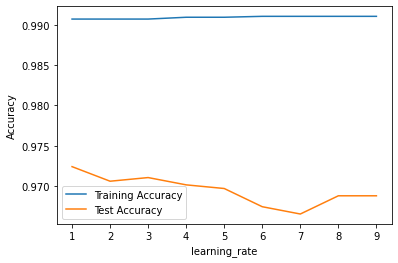

In [47]:
# Plotting the graph to show the Accuracies

plt.plot(depth, tmp_tra_acc, label="Training Accuracy")
plt.plot(depth, tmp_tes_acc, label="Test Accuracy")

plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")

plt.legend()

### 5.9 XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [48]:
# Importing XGBoost Classifier
from xgboost import XGBClassifier

# Instantiating the Model
xgb = XGBClassifier()

# Fitting the Model
xgb.fit(X_train, y_train)

[18:19:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
# Predicting values using the model

y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [50]:
performance_results('XGBoost Classifier', y_train_xgb, y_test_xgb)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.987       0.969
F1 Score             0.988       0.973
Recall               0.993       0.981
Precission           0.984       0.964

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [51]:
# Importing Multi-layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# Instantiating the Model
mlp = MLPClassifier()

# Fitting the Model
mlp.fit(X_train, y_train)

MLPClassifier()

In [52]:
# Predicting values using the model

y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [53]:
performance_results('Multi-layer Perceptron', y_train_mlp, y_test_mlp)


Performance Report:

Score Type   Training Data   Test Data
Accuracy             0.984       0.966
F1 Score             0.986       0.970
Recall               0.980       0.967
Precission           0.992       0.972

---------------------------------------------

Classification Report:

              precision    recall  f1-score   support

          -1       0.96      0.97      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



## 6. Compairing the Models

To compare the models, we are creating a new data frame using the data we have collected so far for each model. The columns of this dataframe are the lists created to store the results of the model.

In [54]:
# Creating a new DataFrame to compare the results

result = pd.DataFrame({
    'ML Model' : model,
    'Accuracy' : accuracy,
    'f1_score' : f1_score,
    'Recall'   : recall,
    'Precision': precision,
})

# Displaying the DataFrame

result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.953,0.930
1,K-Nearest Neighbors,0.956,0.961,0.962,0.960
2,Support Vector Machine,0.964,0.968,0.980,0.957
3,Naive Bayes Classifier,0.605,0.454,0.294,0.995
4,Decision Tree,0.959,0.963,0.964,0.963
5,Random Forest,0.970,0.973,0.978,0.969
6,Gradient Boosting Classifier,0.974,0.977,0.989,0.966
7,CatBoost Classifier,0.972,0.975,0.982,0.969
8,XGBoost Classifier,0.969,0.973,0.981,0.964
9,Multi-layer Perceptron,0.966,0.970,0.967,0.972


In [55]:
# Sorting the Dataframe based on Model Accuracy

sorted_result = result.sort_values(
    by=['Accuracy', 'f1_score'],
    ascending=False
).reset_index(drop=True)

sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.989,0.966
1,CatBoost Classifier,0.972,0.975,0.982,0.969
2,Random Forest,0.970,0.973,0.978,0.969
3,XGBoost Classifier,0.969,0.973,0.981,0.964
4,Multi-layer Perceptron,0.966,0.970,0.967,0.972
5,Support Vector Machine,0.964,0.968,0.980,0.957
6,Decision Tree,0.959,0.963,0.964,0.963
7,K-Nearest Neighbors,0.956,0.961,0.962,0.960
8,Logistic Regression,0.934,0.941,0.953,0.930
9,Naive Bayes Classifier,0.605,0.454,0.294,0.995


### Importance of each feature in the model with highest accuracy

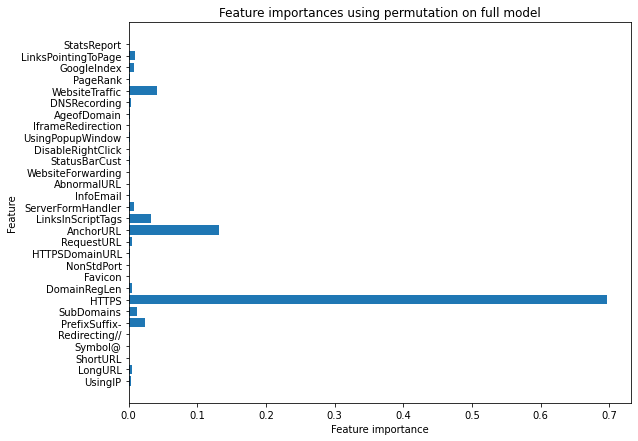

In [56]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')

plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features.

2. Creating this notebook helped us learn a lot about the features affecting the models to detect whether URL is safe or not, also we came to know how to tune the models and how tuning affects the model performance.

3. The final conclusion on the Phishing dataset is that the some feature like "HTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not.

4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.